# NoteBook 1 - Data Wrangling & EDA
# Objective
To automatically categorize/tag TED Talk videos and **identify key topics/trends based on a series of features provided** in a sample dataset, link below.
Once the text data has been cleaned and prepared, a series Classification models will be trained on the sample dataset.

There are two datasets provided: the main summary and the transcripts

**TED Talks: Summary**
https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv

**TED Talks: Transcripts**
https://www.kaggle.com/rounakbanik/ted-talks?select=transcripts.csv

# Problem Statement

**The data provided, in its raw format, does not make for easy classification and statistical analysis of the various TED Talks**.  There is no easy way to decipher trends in popular talk topics, categories, or to further explore specific speakers, their occupations, and general talk focus (transcript summary).

# Benefit of Analysis

Being able to peel back  and examine various layers of details within the dataset to **isolate key trends, categories, or any other features of interest would be beneficial to the analyst/user** in answering a series of questions, often addressed by some of the best and brightest minds in the world and their respective TED talks.  

Being able to quickly classify and assign a given TED talk, based on other similar feature patterns, would allow for **improved viewer experiences from accurate user preference alignment as it relates to Tags, Ratings, and Comment popularity (counts)**.

## Data Provided - Summary:

- **Comments:** The number of first level comments made on the talk
- **Description:** A blurb of what the talk is about
- **Duration:** The duration of the talk in seconds
- **Event:** The TED/TEDx event where the talk took place
- **Film_date:** The Unix timestamp of the filming
- **Languages:** The number of languages in which the talk is available
- **Main_speaker:** The first named speaker of the talk
- **Name:** The official name of the TED Talk; includes the title and the speaker
- **Num_speaker:** The number of speakers in the talk
- **Published_date:** The Unix timestamp for the publication of the talk on TED.com
- **Ratings:** Groups of ratings assigned to each talk
- **Related_talks:** Similar talks/links
- **Speaker_occupation:** Primary speaker occupation/focus
- **Tags:** Tags assigned to the talk
- **Title:** Title of TED talk
- **Url:** The URL of the talk
- **Views:** Total views for talk

## Data Provided - Transcript:
- **Transcript:** The official English transcript of the talk
- **URL:** The URL of the talk

In [1]:
# Import neccessary libaries

import pandas as pd # Dataframes
pd.options.display.max_colwidth = 100 # Set the limit larger (100) to see full string details (Title names, etc.)

import numpy as np # Arrays and Math

# Pandas Profiling Summary report
from pandas_profiling import profile_report

# Visual libraries
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

# set plt inline so plots will automatically run without the .show() command
%matplotlib inline 

# Warnings set to Ignore messages
import warnings
warnings.filterwarnings('ignore')

# Statistical Summary
import statsmodels.formula.api as smf # Statsmodel OLS Summary for Regression Analysis

# Natural Language Processing (NLP)
import string 
import re # RegEX library for specific text isolation

from nltk.tokenize import sent_tokenize, word_tokenize # Tokenize sentences, then words with NLTK
from nltk.corpus import stopwords # Remove stopwords (the, a, is, are, etc.)
from nltk.stem import PorterStemmer # Reduce words back to original base word stem
from nltk import FreqDist # Counts frequency of word distributions

import textstat # Library to count to calculate statistics from text, readability, complexity, etc.

import ast # Abstract Syntax Tree - to help identify and segment information (text) imbedded in lists/dictionaries, etc.

from wordcloud import WordCloud, STOPWORDS # Wordcloud summary function, with supporting StopWords removal

from collections import Counter # Counter function for word frequencies (top 10 etc.)

# Track Time for measuring processing time on different ML models/parameters
from time import time

# Save and Reload Jupyter Notebook at Stages - Dill
import dill

#### Importing Dataset 1: Summary Details

In [2]:
# Import the TED summary dataset as a DataFrame
data1 = pd.read_csv('ted_main.csv')

#### Importing Dataset 2: Transcripts

In [3]:
# Import the TED transcripts dataset as a DataFrame
data2 = pd.read_csv('transcripts.csv')

In [4]:
# Create a copy DataFrame for each dataset, keeping data as backup if needed
TED_summ = data1.copy()

TED_trans = data2.copy()

In [5]:
# Set the dataframe summaries to include all columns - no truncating
pd.set_option('display.max_columns', None)

# View the top 5 rows of data - Summary
TED_summ.head()

comments  \
0      4553   
1       265   
2       124   
3       200   
4       593   

                                                                                           description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education syst...   
1  With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 way...   
2  New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders,...   
3  In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for e...   
4  You've never seen data presented like this. With the drama and urgency of a sportscaster, statis...   

   duration    event   film_date  languages   main_speaker  \
0      1164  TED2006  1140825600         60   Ken Robinson   
1       977  TED2006  1140825600         43        Al Gore   
2      1286  TED2006  1140739200         26    David Pogue   
3      1116  TED2006  1140912000         35  Majora Carter   
4      1190  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                                                                               ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id':...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'id': 3, 'name': 'Courageous', 'count': 45}, {'id': ...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}, {'id': 1, 'name': 'Beautiful', 'count': 291}, {'...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}, {'id': 7, 'name': 'Funny', 'count': 1390}, {'id'...   

                                                                                         related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robi...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/images/ted/566c14767bd62c5ff760e483c5b16cd2753328cd_...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/images/ted/b7f415a054cc0a2bfdd90d0ad5a7f64cf060150d...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/images/ted/96c703bb13a2e9c2d351a5e6b52390bc35eaad06...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/images/ted/afc9b259845ec1b543419871e10753d4d9044fda...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                                                                  tags  \
0                 ['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']   
1  ['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'sci...   
2  ['computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity'...   
3  ['MacArthur grant', 'activism', 'business', 'cities', 'environment', 'green', 'inequality', 'pol...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economics', 'global development', 'global issues', 'health...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                

In [6]:
# View the top 5 rows of data - Transcripts
TED_trans.head()

transcript  \
0  Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whol...   
1  Thank you so much, Chris. And it's truly a great honor to have the opportunity to come to this s...   
2  (Music: "The Sound of Silence," Simon & Garfunkel)Hello voice mail, my old friend.(Laughter)I've...   
3  If you're here today — and I'm very happy that you are — you've all heard about how sustainable ...   
4  About 10 years ago, I took on the task to teach global development to Swedish undergraduate stud...   

                                                                              url  
0           https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity\n  
1                  https://www.ted.com/talks/al_gore_on_averting_climate_crisis\n  
2                   https://www.ted.com/talks/david_pogue_says_simplicity_sells\n  
3               https://www.ted.com/talks/majora_carter_s_tale_of_urban_renewal\n  
4  https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen\n

In [7]:
# View the bottom 5 rows of data - Summary
TED_summ.tail()

comments  \
2545        17   
2546         6   
2547        10   
2548        32   
2549         8   

                                                                                              description  \
2545  Between 2008 and 2016, the United States deported more than three million people. What happens t...   
2546  How can you study Mars without a spaceship? Head to the most Martian place on Earth -- the Ataca...   
2547  Science fiction visions of the future show us AI built to replicate our way of thinking -- but w...   
2548  In an unmissable talk about race and politics in America, Theo E.J. Wilson tells the story of be...   
2549  With more than half of the world population living in cities, one thing is undeniable: we are an...   

      duration         event   film_date  languages         main_speaker  \
2545       476       TED2017  1496707200          4     Duarte Geraldino   
2546       290       TED2017  1492992000          3  Armando Azua-Bustos   
2547       651       TED2017  1492992000          1       Radhika Nagpal   
2548      1100  TEDxMileHigh  1499472000          1     Theo E.J. Wilson   
2549       519       TED2017  1492992000          1    Karoliina Korppoo   

                                                                           name  \
2545       Duarte Geraldino: What we're missing in the debate about immigration   
2546                       Armando Azua-Bustos: The most Martian place on Earth   
2547  Radhika Nagpal: What intelligent machines can learn from a school of fish   
2548             Theo E.J. Wilson: A black man goes undercover in the alt-right   
2549      Karoliina Korppoo: How a video game might help us build better cities   

      num_speaker  published_date  \
2545            1      1505851216   
2546            1      1505919737   
2547            1      1506006095   
2548            1      1506024042   
2549            1      1506092422   

                                                                                                  ratings  \
2545  [{'id': 3, 'name': 'Courageous', 'count': 24}, {'id': 8, 'name': 'Informative', 'count': 33}, {'...   
2546  [{'id': 22, 'name': 'Fascinating', 'count': 32}, {'id': 8, 'name': 'Informative', 'count': 38}, ...   
2547  [{'id': 1, 'name': 'Beautiful', 'count': 14}, {'id': 8, 'name': 'Informative', 'count': 32}, {'i...   
2548  [{'id': 11, 'name': 'Longwinded', 'count': 3}, {'id': 21, 'name': 'Unconvincing', 'count': 6}, {...   
2549  [{'id': 21, 'name': 'Unconvincing', 'count': 21}, {'id': 8, 'name': 'Informative', 'count': 25},...   

                                                                                            related_talks  \
2545  [{'id': 2596, 'hero': 'https://pe.tedcdn.com/images/ted/00702bc1ae05ccf5f79b44ec84955517bbf030fa...   
2546  [{'id': 2491, 'hero': 'https://pe.tedcdn.com/images/ted/a8dbff8cfccb989af849c15247d98d81283915c8...   
2547  [{'id': 2346, 'hero': 'https://pe.tedcdn.com/images/ted/87f82eddb91d2c806ebb11465d846c47f481902c...   
2548  [{'id': 2512, 'hero': 'https://pe.tedcdn.com/images/ted/6094382cb03573581a6b2e3f6c7f0ce1adf7173c...   
2549  [{'id': 2682, 'hero': 'https://pe.tedcdn.com/images/ted/5344a548b578587ac392c3e05e0e604f55371d94...   

       speaker_occupation  \
2545           Journalist   
2546       Astrobiologist   
2547    Robotics engineer   
2548  Public intellectual   
2549        Game designer   

                                                                                                     tags  \
2545  ['TED Residency', 'United States', 'community', 'family', 'immigration', 'journalism', 'social c...   
2546  ['Mars', 'South America', 'TED Fellows', 'astrobiology', 'biology', 'exploration', 'extraterrest...   
2547       ['AI', 'ants', 'fish', 'future', 'innovation', 'insects', 'intelligence', 'robots', 'science']   
2548                 ['Internet', 'TEDx', 'United States', 'community', 'compassion', 'politics', 'race']   
2549  ['cities', 'design', 'futur

In [8]:
# View the bottom 5 rows of data - Summary
TED_trans.tail()

transcript  \
2462  So, Ma was trying to explain something to me about Grandma and when they grew up, but I couldn't...   
2463  This is a picture of a sunset on Mars taken by NASA's Curiosity rover in 2013. Mars is a very co...   
2464  In my early days as a graduate student, I went on a snorkeling trip off the coast of the Bahamas...   
2465  I took a cell phone and accidentally made myself famous.(Laughter)I was just talking about the t...   
2466  We humans are becoming an urban species, so cities, they are our natural habitat. That is where ...   

                                                                                                      url  
2462      https://www.ted.com/talks/duarte_geraldino_what_we_re_missing_in_the_debate_about_immigration\n  
2463                      https://www.ted.com/talks/armando_azua_bustos_the_most_martian_place_on_earth\n  
2464  https://www.ted.com/talks/radhika_nagpal_what_intelligent_machines_can_learn_from_a_school_of_fi...  
2465             https://www.ted.com/talks/theo_e_j_wilson_a_black_man_goes_undercover_in_the_alt_right\n  
2466     https://www.ted.com/talks/karoliina_korppoo_how_a_video_game_might_help_us_build_better_cities\n

In [9]:
# Inspect the overall shape of the data (rows/columns)
print("DataFrame Shapes:\n")
print("Summary Shape: {}".format(TED_summ.shape))
print("Transcripts Shape: {}".format(TED_trans.shape))

DataFrame Shapes:

Summary Shape: (2550, 17)
Transcripts Shape: (2467, 2)


- The summary file has 2,550 rows of data and 17 columns
- The Transcripts file has slightly less rows (2,467) and only 2 columns

**Both DataFrames have a URL column**, which can likely serve as the same column for merging both datasets into one overall DataFrame.  **83 rows of data will be lost** due to the Transcripts DataFrame having a lower overall row count.

In [10]:
# Use Pandas merge function to combine both datasets on the shared column, URL
TED_combined = pd.merge(TED_summ, TED_trans, how = 'inner', on = 'url') # Use inner to only keep records that match both datasets
print("Combined TED Summary Shape: {}".format(TED_combined.shape))

Combined TED Summary Shape: (2467, 18)


We now have 2,467 combined rows and 18 columns in the combined dataset.

In [11]:
# Convert all column names to upper case (each word) to remain uniform with new Ratings columns
TED_combined.columns = TED_combined.columns.str.title()

# Examine the first row of data to make sure all columns correctly named
TED_combined.head(1)

Comments  \
0      4553   

                                                                                           Description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education syst...   

   Duration    Event   Film_Date  Languages  Main_Speaker  \
0      1164  TED2006  1140825600         60  Ken Robinson   

                                        Name  Num_Speaker  Published_Date  \
0  Ken Robinson: Do schools kill creativity?            1      1151367060   

                                                                                               Ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id...   

                                                                                         Related_Talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robi...   

  Speaker_Occupation  \
0    Author/educator   

                                                                                   Tags  \
0  ['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']   

                         Title  \
0  Do schools kill creativity?   

                                                                     Url  \
0  https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity\n   

      Views  \
0  47227110   

                                                                                            Transcript  
0  Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whol...

In [12]:
# Examine the combined dataset for missing values and column data types
TED_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2466
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Comments            2467 non-null   int64 
 1   Description         2467 non-null   object
 2   Duration            2467 non-null   int64 
 3   Event               2467 non-null   object
 4   Film_Date           2467 non-null   int64 
 5   Languages           2467 non-null   int64 
 6   Main_Speaker        2467 non-null   object
 7   Name                2467 non-null   object
 8   Num_Speaker         2467 non-null   int64 
 9   Published_Date      2467 non-null   int64 
 10  Ratings             2467 non-null   object
 11  Related_Talks       2467 non-null   object
 12  Speaker_Occupation  2461 non-null   object
 13  Tags                2467 non-null   object
 14  Title               2467 non-null   object
 15  Url                 2467 non-null   object
 16  Views               2467

There are **no null values** out of the 2,467 entries, however, **Speaker Occupation appears to be missing 6 values** which could be NAs and will require further analysis.

The variables with Object datatypes can be converted to categorical values, saving space and improving EDA presentation.

### Convert Date Columns to DateTime then Object Data Type to Category

In [13]:
# Update Category datatype, for data columns, to DateTime - initial dataset includes seconds so set unit = 's'
TED_combined['Film_Date'] = pd.to_datetime(TED_combined['Film_Date'], unit = 's')
TED_combined['Published_Date'] = pd.to_datetime(TED_combined['Film_Date'], unit = 's')

In [14]:
# Update Object datatype to Category
for columns in TED_combined:
    if TED_combined[columns].dtype == 'object':
        TED_combined[columns] = TED_combined[columns].astype('category')

In [15]:
# Reexamine DataFrame ensuring all datatypes previously Object are now Categorical
TED_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2466
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Comments            2467 non-null   int64         
 1   Description         2467 non-null   category      
 2   Duration            2467 non-null   int64         
 3   Event               2467 non-null   category      
 4   Film_Date           2467 non-null   datetime64[ns]
 5   Languages           2467 non-null   int64         
 6   Main_Speaker        2467 non-null   category      
 7   Name                2467 non-null   category      
 8   Num_Speaker         2467 non-null   int64         
 9   Published_Date      2467 non-null   datetime64[ns]
 10  Ratings             2467 non-null   category      
 11  Related_Talks       2467 non-null   category      
 12  Speaker_Occupation  2461 non-null   category      
 13  Tags                2467 non-null   category    

- All columns correctly reflect **Category if previously an Object datatype, excluding Film Date and Published Date** which are set to datetime datatypes.

In [16]:
# Inspect total count of null values in dataset
TED_combined.isnull().sum()

Comments              0
Description           0
Duration              0
Event                 0
Film_Date             0
Languages             0
Main_Speaker          0
Name                  0
Num_Speaker           0
Published_Date        0
Ratings               0
Related_Talks         0
Speaker_Occupation    6
Tags                  0
Title                 0
Url                   0
Views                 0
Transcript            0
dtype: int64

In [17]:
# Inspect total count of NA (NaN) values in dataset
TED_combined.isna().sum()

Comments              0
Description           0
Duration              0
Event                 0
Film_Date             0
Languages             0
Main_Speaker          0
Name                  0
Num_Speaker           0
Published_Date        0
Ratings               0
Related_Talks         0
Speaker_Occupation    6
Tags                  0
Title                 0
Url                   0
Views                 0
Transcript            0
dtype: int64

Due to the fact that there are **only 6 speakers with missing occupations**, all of whom can likely be searched online for generic occupations, these entries can be **manually encoded**.

In [18]:
TED_combined['Main_Speaker'][TED_combined['Speaker_Occupation'].isna() == True].values.tolist()

['Sonaar Luthra',
 'Rick Falkvinge',
 'Gary Kovacs',
 'Ryan Holladay',
 'Brian Dettmer',
 'Boniface Mwangi']

In [19]:
# Create a list of speakers with missing occupations
speakers = TED_combined['Main_Speaker'][TED_combined['Speaker_Occupation'].isna() == True].values.tolist()

# create an, ordered, input list for respective speaker occupations (from online search)
occupations_input = ['Designer', 'Entrepreneur', 'CEO', 'Inventor', 'Artist', 'Journalist']

# for loop to update each speaker with respective occupation that was missig
for speaker in speakers:
    for occupation in occupations_input:
        TED_combined['Speaker_Occupation'][TED_combined['Main_Speaker'] == speaker] = occupation

In [20]:
# Recheck the count of NAs to ensure above loop removed all
TED_combined.isna().sum()

Comments              0
Description           0
Duration              0
Event                 0
Film_Date             0
Languages             0
Main_Speaker          0
Name                  0
Num_Speaker           0
Published_Date        0
Ratings               0
Related_Talks         0
Speaker_Occupation    0
Tags                  0
Title                 0
Url                   0
Views                 0
Transcript            0
dtype: int64

There are no missing values in the Speaker Occupation column.

In [21]:
# Inspect total unique counts by column

TED_combined.nunique()

Comments               555
Description           2464
Duration              1059
Event                  320
Film_Date              690
Languages               65
Main_Speaker          2088
Name                  2464
Num_Speaker              5
Published_Date         690
Ratings               2464
Related_Talks         2464
Speaker_Occupation    1421
Tags                  2447
Title                 2464
Url                   2464
Views                 2464
Transcript            2464
dtype: int64

In [22]:
# Inspect Number of Speakers (per talk) column (only column with low unique values count)
TED_combined['Num_Speaker'].value_counts()

1    2412
2      46
3       5
4       3
5       1
Name: Num_Speaker, dtype: int64

**Observations**
- 320 unique events listed (e.g. TED2017)
- There 65 unique languages and 555 unique comments tracked indicate **unique counts of languages/comments per event (e.g. 4 different languages and 10 comments for a given TED talk)**
- As expected, the majority of speakers per talk is 1 (2,412), however there were 46 cases of 2 speakers presenting

In [23]:
# Run descriptive statistics summary for all variables - including categorical
TED_combined.describe(include = 'all').T

count unique  \
Comments            2467    NaN   
Description         2467   2464   
Duration            2467    NaN   
Event               2467    320   
Film_Date           2467    690   
Languages           2467    NaN   
Main_Speaker        2467   2088   
Name                2467   2464   
Num_Speaker         2467    NaN   
Published_Date      2467    690   
Ratings             2467   2464   
Related_Talks       2467   2464   
Speaker_Occupation  2467   1421   
Tags                2467   2447   
Title               2467   2464   
Url                 2467   2464   
Views               2467    NaN   
Transcript          2467   2464   

                                                                                                                    top  \
Comments                                                                                                            NaN   
Description         Shame is an unspoken epidemic, the secret behind many forms of broken behavior. Brené Brown, who...   
Duration                                                                                                            NaN   
Event                                                                                                           TED2014   
Film_Date                                                                                           2017-04-24 00:00:00   
Languages                                                                                                           NaN   
Main_Speaker                                                                                               Hans Rosling   
Name                                         Jonathan Haidt: Religion, evolution, and the ecstasy of self-transcendence   
Num_Speaker                                                                                                         NaN   
Published_Date                                                                                      2017-04-24 00:00:00   
Ratings             [{'id': 9, 'name': 'Ingenious', 'count': 577}, {'id': 23, 'name': 'Jaw-dropping', 'count': 480},...   
Related_Talks       [{'id': 1327, 'hero': 'https://pe.tedcdn.com/images/ted/f076b40cf5edbc49c2ca06333cb77a8f377ecf4f...   
Speaker_Occupation                                                                                               Writer   
Tags                                                            ['entertainment', 'live music', 'music', 'performance']   
Title                                                                                                Listening to shame   
Url                                                             https://www.ted.com/talks/rob_reid_the_8_billion_ipod\n   
Views                                                                                                               NaN   
Transcript          I'm going to tell you a little bit about my TEDxHouston Talk. I woke up the morning after I gave...   

                   freq      first       last        mean          std  \
Comments            NaN        NaT        NaT     192.571       284.83   
Description           2        NaT        NaT         NaN          NaN   
Duration            NaN        NaT        NaT      821.76       334.09   
Event                84        NaT        NaT         NaN          NaN   
Film_Date            64 1984-02-02 2017-08-27         NaN          NaN   
Languages           NaN        NaT        NaT     28.2914      8.22976   
Main_Speaker          9        NaT        NaT         NaN          NaN   
Name                  2        NaT        NaT         NaN          NaN   
Num_Speaker         NaN        NaT        NaT     1.02797     0.208371   
Published_Date       64 1984-02-02 2017-08-27         NaN          NaN   
Ratings               2        NaT        NaT         NaN          NaN   
Related_Talks         2        NaT        NaT         NaN          NaN   
Speaker_Occupation   45        NaT        NaT        

**Initial Sample Observations**
- **Hans Rosling** was the most frequent speaker (9 presentations)
- The most common speaker occupation is Writer (45 occurrences)
- The most frequent date for filming, and subsequently publishing, was **4/24/2017 (64 occurrences)**
- The most frequent event (year) is **TED2014 (84 occurrences)**

### Top 5 Events, Speakers, and Occupations

In [24]:
# Inspect the top 5 speaker occupations
TED_combined['Event'].value_counts().head(5)

TED2014    84
TED2009    81
TED2013    77
TED2016    75
TED2015    75
Name: Event, dtype: int64

In [25]:
# Inspect the top 5 main speakers
TED_combined['Main_Speaker'].value_counts().head(5)

Hans Rosling      9
Juan Enriquez     7
Marco Tempest     6
Rives             6
Jonathan Haidt    5
Name: Main_Speaker, dtype: int64

In [26]:
# Inspect the top 5 speaker occupations
TED_combined['Speaker_Occupation'].value_counts().head(5)

Writer          45
Journalist      38
Artist          34
Designer        34
Entrepreneur    30
Name: Speaker_Occupation, dtype: int64

### Top 10 Talks of All Time

In [27]:
# Divide Views by 1M to make for easier viewing/analysis - rounded 2 decimals
TED_combined['Views'] = round(TED_combined['Views']/1000000, 2)

In [28]:
# Summary of top 10 viewed TED talks
TED_combined[['Main_Speaker', 'Title', 'Views']].sort_values('Views', ascending = False).head(10)

Main_Speaker                                              Title  \
0          Ken Robinson                        Do schools kill creativity?   
1268          Amy Cuddy           Your body language may shape who you are   
649         Simon Sinek                   How great leaders inspire action   
800         Brené Brown                         The power of vulnerability   
444          Mary Roach             10 things you didn't know about orgasm   
1695    Julian Treasure         How to speak so that people want to listen   
198   Jill Bolte Taylor                               My stroke of insight   
5          Tony Robbins                               Why we do what we do   
2033       James Veitch  This is what happens when you reply to spam email   
1338    Cameron Russell  Looks aren't everything. Believe me, I'm a model.   

      Views  
0     47.23  
1268  43.16  
649   34.31  
800   31.17  
444   22.27  
1695  21.59  
198   21.19  
5     20.69  
2033  20.48  
1338  19.79

The **top 3 TED Talks of all time**, by total views, are:
- **Do Schools Kill Creativity by Ken Robinson (47.2M)**
- Your Body Language May Shape Who You Are by Amy Cuddy (43.2M)
- How Great Leaders Inspire by Simon Sinek (34.3)

We can see a large drop off in overall views after the top 2 Talks, 43.2M to 34.3M, with **an even larger drop off in total views from 4th to 5th**:
- The Power of Vulnerability by Brené Brown (31.2M)
- 10 Things you Didn't Know about Orgasm by Mary Roach (22.3M)

### Reducing Dataset - Remove Unneccessary Rows/Columns
- Since almost 98% of the Talks involved only 1 speaker, all talks with a higher count can be removed
- The following columns **don't benefit the purposes of this project as it relates to Natural Language Processing:**
    - Related Talks
    - URL
    - Number of Speakers (Hardly ever more than 1)    
    - Name (redundant - concatenation of  Speaker and Title)

In [29]:
TED_combined.head(1)

Comments  \
0      4553   

                                                                                           Description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education syst...   

   Duration    Event  Film_Date  Languages  Main_Speaker  \
0      1164  TED2006 2006-02-25         60  Ken Robinson   

                                        Name  Num_Speaker Published_Date  \
0  Ken Robinson: Do schools kill creativity?            1     2006-02-25   

                                                                                               Ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id...   

                                                                                         Related_Talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robi...   

  Speaker_Occupation  \
0    Author/educator   

                                                                                   Tags  \
0  ['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']   

                         Title  \
0  Do schools kill creativity?   

                                                                     Url  \
0  https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity\n   

   Views  \
0  47.23   

                                                                                            Transcript  
0  Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whol...

In [30]:
# Drop the above listed columns from the combined DataFrame
TED_combined.drop(columns = ['Related_Talks', 'Url', 'Name', 'Num_Speaker'], axis = 1, inplace = True)

In [31]:
# Inspect updated DataFrame shape
TED_combined.shape

(2467, 14)

After removing the 6 columns mentioned above, the DataFrame now consists of **2.467 rows and 14 columns**.

### Converting Duration from Seconds to Minutes
The Duration variable will be easier to understand if converted to minutes, as many talks are in the thousands of seconds timeframe.

In [32]:
# Examine the statistical summary of Duration - noting all results in seconds
TED_combined['Duration'].describe()

count    2467.000000
mean      821.760032
std       334.090010
min       135.000000
25%       582.000000
50%       852.000000
75%      1047.000000
max      3608.000000
Name: Duration, dtype: float64

In [33]:
# Convert duration from seconds to minutes
TED_combined['Duration'] = round(TED_combined['Duration'] / 60, 2)

In [34]:
# Examine the statistical summary of Duration - noting all results now in minutes
TED_combined['Duration'].describe()

count    2467.000000
mean       13.695975
std         5.568189
min         2.250000
25%         9.700000
50%        14.200000
75%        17.450000
max        60.130000
Name: Duration, dtype: float64

In [35]:
# Inspect the shortest TED talk in the dataset
TED_combined[['Title', 'Main_Speaker', 'Event', 'Duration']][TED_combined['Duration'] == TED_combined['Duration'].min()]

Title      Main_Speaker    Event  Duration
234  The ancestor of language  Murray Gell-Mann  TED2007      2.25

In [36]:
# Inspect the longest TED talk in the dataset
TED_combined[['Title', 'Main_Speaker', 'Event', 'Duration']][TED_combined['Duration'] == TED_combined['Duration'].max()]

Title       Main_Speaker  \
2306  Nationalism vs. globalism: the new political divide  Yuval Noah Harari   

              Event  Duration  
2306  TED Dialogues     60.13

- The Duration variable is easier to understand now that it is reflected in minutes
- The average TED talk was just under 14 minutes long, with the **maximum length being 1 hour and the minimum being just 2.5 minutes long**
    - Min: The Ancestor of Language by Murray Gell-Mann at the TED2007 event (2.5 minutes)
    - Max: Nationalism vs. Globalism: The New Political Divide by Yuval Noah Harari at the TED Dialogues event (60 minutes)

#### Create Text Statistics (Counts)

In [37]:
# Create empty count lists and loop through appending textstat counts accordingly
sentence_cnt = []
character_cnt = []
word_cnt = []
words_per_sent = []

for i in TED_combined['Transcript']:
    
    # Use TextStat libraries for Sentence/Character count
    sentence_cnt.append(textstat.sentence_count(i))
    character_cnt.append(textstat.char_count(i, ignore_spaces = True))
    word_cnt.append(len(i.split())) # Can simply use split function for each word - not a TextStat Library
    words_per_sent.append(round(textstat.words_per_sentence(i),2)) # Can simply use split function for each word - not a TextStat Library   

In [38]:
# Add counts to main DataFrame
TED_combined['Sentence_Cnt'] = sentence_cnt
TED_combined['Character_Cnt'] = character_cnt
TED_combined['Word_Cnt'] = word_cnt
TED_combined['Words_Per_Sent'] = words_per_sent

In [39]:
# Examine the top 1 row to confirm the 4 new columns above correctly mapped
TED_combined.head(1)

Comments  \
0      4553   

                                                                                           Description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education syst...   

   Duration    Event  Film_Date  Languages  Main_Speaker Published_Date  \
0      19.4  TED2006 2006-02-25         60  Ken Robinson     2006-02-25   

                                                                                               Ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id...   

  Speaker_Occupation  \
0    Author/educator   

                                                                                   Tags  \
0  ['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']   

                         Title  Views  \
0  Do schools kill creativity?  47.23   

                                                                                            Transcript  \
0  Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whol...   

   Sentence_Cnt  Character_Cnt  Word_Cnt  Words_Per_Sent  
0           191          14344      3066           16.05

In the above summary for the talk by Ken Robinson, we can see that there were **191 sentences and almost 3,100 words in total, with an average of 16 words per sentence**.

#### Convert Ratings & Tags Lists to Dictionaries

In [40]:
# Convert Ratings column to individual dictionary lists of strings, by row
TED_combined['Ratings'] = [ast.literal_eval(x) for x in TED_combined['Ratings']]

In [41]:
# Convert tags column to individual lists of strings, by row
TED_combined['Tags'] = [ast.literal_eval(x) for x in TED_combined['Tags']]

In [42]:
# Examine the list of all Ratings assigned to the first TED talk on the 1st row
TED_combined['Ratings'][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [43]:
# Examine the list of all Tags assigned to the first TED talk on the 1st row
TED_combined['Tags'][0]

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching']

The Ratings column now reflects a **list of dictionary entries for each rating and respective count assigned** - e.g. Funny at 19,645 for the 1st row.

In [44]:
# Function to extract total number from ratings column (list)
def get_total(x):
    """
    Function counts and aggregates the embedded rating counts (inside a list of dictionaries) to derive the total for each row
    (TED talk).
    
    x: input column - Ratings column to iterate through

    """
    count = 0
    for i in x:
        # i = Dictionary Counts
        count += i['count'] # Increase by each row's dictionary 'count' key, summing up the totals
    return count

In [45]:
# Apply the above function to create a total of all Ted Ratings, by row/talk
TED_combined['Total_Ratings'] = TED_combined['Ratings'].apply(lambda x: get_total(x))

In [46]:
# Sort the dataset by highest count of reviews
TED_combined.sort_values(by = 'Total_Ratings', ascending = False).head()

Comments  \
0         4553   
198       2877   
1268      2290   
800       1927   
649       1930   

                                                                                              Description  \
0     Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education syst...   
198   Jill Bolte Taylor got a research opportunity few brain scientists would wish for: She had a mass...   
1268  Body language affects how others see us, but it may also change how we see ourselves. Social psy...   
800   Brené Brown studies human connection -- our ability to empathize, belong, love. In a poignant, f...   
649   Simon Sinek has a simple but powerful model for inspirational leadership -- starting with a gold...   

      Duration             Event  Film_Date  Languages       Main_Speaker  \
0        19.40           TED2006 2006-02-25         60       Ken Robinson   
198      18.32           TED2008 2008-02-27         49  Jill Bolte Taylor   
1268     21.03    TEDGlobal 2012 2012-06-26         51          Amy Cuddy   
800      20.32       TEDxHouston 2010-06-06         52        Brené Brown   
649      18.07  TEDxPuget Sound  2009-09-17         45        Simon Sinek   

     Published_Date  \
0        2006-02-25   
198      2008-02-27   
1268     2012-06-26   
800      2010-06-06   
649      2009-09-17   

                                                                                                  Ratings  \
0     [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id...   
198   [{'id': 22, 'name': 'Fascinating', 'count': 14447}, {'id': 10, 'name': 'Inspiring', 'count': 169...   
1268  [{'id': 23, 'name': 'Jaw-dropping', 'count': 3586}, {'id': 8, 'name': 'Informative', 'count': 97...   
800   [{'id': 10, 'name': 'Inspiring', 'count': 21444}, {'id': 23, 'name': 'Jaw-dropping', 'count': 21...   
649   [{'id': 21, 'name': 'Unconvincing', 'count': 930}, {'id': 25, 'name': 'OK', 'count': 1341}, {'id...   

            Speaker_Occupation  \
0              Author/educator   
198             Neuroanatomist   
1268       Social psychologist   
800   Vulnerability researcher   
649          Leadership expert   

                                                                                                  Tags  \
0                               [children, creativity, culture, dance, education, parenting, teaching]   
198                                   [biology, brain, consciousness, global issues, illness, science]   
1268                                       [body language, brain, business, psychology, self, success]   
800   [TEDx, communication, culture, depression, fear, mental health, psychology, self, social change]   
649                                                [TEDx, business, entrepreneur, leadership, success]   

                                         Title  Views  \
0                  Do schools kill creativity?  47.23   
198                       My stroke of insight  21.19   
1268  Your body language may shape who you are  43.16   
800                 The power of vulnerability  31.17   
649           How great leaders inspire action  34.31   

                                                                                               Transcript  \
0     Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whol...   
198   I grew up to study the brain because I have a brother who has been diagnosed with a brain disord...   
1268  So I want to start by offering you a free no-tech life hack, and all it requires of you is this:...   
800   So, I'll start with this: a couple years ago, an event planner called me because I was going to ...   
649   How do you explain when things don't go as we assume? Or better, how do you explain when others ...   

      Sentence_Cnt  Character_Cnt  Word_Cnt  Words_Per_Sent  Total_Ratings  
0              191          14344      3066           16.05         

#### Talks with Lowest/Highest Ratings

In [47]:
# Identify the Video and Speaker with the lowest total rating counts
TED_combined[['Title', 'Main_Speaker','Total_Ratings']][TED_combined['Total_Ratings'] == TED_combined['Total_Ratings'].min()]

Title       Main_Speaker  \
2445  How your pictures can help reclaim lost history  Chance Coughenour   

      Total_Ratings  
2445             68

In [48]:
# Identify the Video and Speaker with the highest total rating counts
TED_combined[['Title', 'Main_Speaker','Total_Ratings']][TED_combined['Total_Ratings'] == TED_combined['Total_Ratings'].max()]

Title  Main_Speaker  Total_Ratings
0  Do schools kill creativity?  Ken Robinson          93850

#### Observations
- The most rated TED talk of all time is **Do schools kill creativity? by Ken Robinson (93,850 total reviews)**
- The least rated TED talk of all time is **How your pictures can help reclaim lost history by Chance Coughenour (68 total reviews)**

### Isolate Unique Ratings (Inside Row List/Dictionary)

In [49]:
# Create an empty list to append all ratings from the combined dictionary, looping through each iteration in prior lists
ratings = []
for h in range(0,len(TED_combined)):
    for i in TED_combined['Ratings'][h]:
        ratings.append(i['name'])

In [50]:
# Confirm that the first 28 records (first 2 rows) in the ratings list against the first two rows in the DataFrame for ratings
ratings[0:28]

['Funny',
 'Beautiful',
 'Ingenious',
 'Courageous',
 'Longwinded',
 'Confusing',
 'Informative',
 'Fascinating',
 'Unconvincing',
 'Persuasive',
 'Jaw-dropping',
 'OK',
 'Obnoxious',
 'Inspiring',
 'Funny',
 'Courageous',
 'Confusing',
 'Beautiful',
 'Unconvincing',
 'Longwinded',
 'Informative',
 'Inspiring',
 'Fascinating',
 'Ingenious',
 'Persuasive',
 'Jaw-dropping',
 'Obnoxious',
 'OK']

In [51]:
# The list below for the Name keys should match the list above, for each of the 28 records (first 2 rows)
TED_combined['Ratings'][0] + TED_combined['Ratings'][1]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924},
 {'id': 7, 'name': 'Funny', 'count': 544},
 {'id': 3, 'name': 'Courageous', 'count': 139},
 {'id': 2, 'name': 'Confusing', 'count': 62},
 {'id': 1, 'name': 'Beautiful', 'count': 58},
 {'id': 21, 'name': 'Unconvincing', 'count': 258},
 {'id': 11, 'name': 'Longwinded', 'count': 113},
 {'id': 8, 'name': 'Informative', '

In [52]:
# Create a list of only unique ratings within the entire ratings list 
unq_ratings = [i for n, i in enumerate(ratings) if i not in ratings[:n]]
   
# Examine the list
unq_ratings

['Funny',
 'Beautiful',
 'Ingenious',
 'Courageous',
 'Longwinded',
 'Confusing',
 'Informative',
 'Fascinating',
 'Unconvincing',
 'Persuasive',
 'Jaw-dropping',
 'OK',
 'Obnoxious',
 'Inspiring']

In [53]:
print(unq_ratings)

['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']


In [54]:
# Rename Jaw Dropping to upper case for both words
unq_ratings[-4] = 'Jaw-Dropping'

In [55]:
print("Length of Unique Ratings List: {}".format(len(unq_ratings)))

Length of Unique Ratings List: 14


### Isolate Unique Tags (Inside Row List)

In [56]:
# Create an empty list to append all ratings from the combined dictionary, looping through each iteration in prior lists
tags = []
for h in range(0,len(TED_combined)):
    for i in TED_combined['Tags'][h]:
        tags.append(i)

# Print the count of values in the List        

print("Total values in List: {}".format(len(tags)))

# Convert tags list to a set to isolate unique values only
unq_tags_set = set(tags)

# Print the count of unique values in the Set

print("Total values in Set: {}".format(len(unq_tags_set)))

Total values in List: 18634
Total values in Set: 416


In [57]:
# Create a DataFrame (Series) - for easier EDA analysis of Tags
unq_tags = pd.DataFrame(tags)

# Rename the first column and examine the DataFrame
unq_tags.rename(columns = {unq_tags.columns[0]: 'Unique_Tags'}, inplace = True)

# Summarize the top 20 tags for TED talks
unq_tags.value_counts().head(20)

Unique_Tags  
technology       712
science          548
global issues    490
culture          476
TEDx             418
design           408
business         338
entertainment    287
health           234
innovation       224
society          223
art              218
social change    216
future           194
communication    190
creativity       182
biology          182
humanity         177
collaboration    169
environment      162
dtype: int64

In [58]:
# Create a DataFrame (Series) - for easier EDA analysis of Tags
unq_tags = pd.DataFrame(unq_tags)

# Print total Tag count
print("Length of Unique Tags List: {}".format(len(unq_tags)))

Length of Unique Tags List: 18634


### Create Columns for Each Rating Count

In [59]:
def list_to_dict(l):

    """
    Function to convert a list to a dictionary.
    
    l: List input
    
    """
        
    new_dict = {}

    for d in l:
    
        new_dict[d['name']] = d['count'] # Extract the name and respective count into a dictionary for each rating in the row
        
    return new_dict 

# Test the funtion below (not saving to the DataFrame)
TED_combined['Ratings'].apply(list_to_dict)

0       {'Funny': 19645, 'Beautiful': 4573, 'Ingenious': 6073, 'Courageous': 3253, 'Longwinded': 387, 'C...
1       {'Funny': 544, 'Courageous': 139, 'Confusing': 62, 'Beautiful': 58, 'Unconvincing': 258, 'Longwi...
2       {'Funny': 964, 'Courageous': 45, 'Ingenious': 183, 'Beautiful': 60, 'Unconvincing': 104, 'Longwi...
3       {'Courageous': 760, 'Beautiful': 291, 'Confusing': 32, 'Funny': 59, 'Ingenious': 105, 'Unconvinc...
4       {'Ingenious': 3202, 'Funny': 1390, 'Beautiful': 942, 'Courageous': 318, 'Longwinded': 110, 'Conf...
                                                       ...                                                 
2462    {'Courageous': 24, 'Informative': 33, 'Inspiring': 27, 'Funny': 1, 'Persuasive': 24, 'Ingenious'...
2463    {'Fascinating': 32, 'Informative': 38, 'Inspiring': 20, 'Persuasive': 7, 'Jaw-dropping': 8, 'Ing...
2464    {'Beautiful': 14, 'Informative': 32, 'Ingenious': 19, 'Inspiring': 30, 'Courageous': 2, 'Confusi...
2465    {'Longwinded': 3, 'U

In [60]:
# Apply the function to the Ratings column   
TED_combined['Ratings_Dict'] = TED_combined['Ratings'].apply(list_to_dict) 

# Update 'Jaw-dropping' in dictionary to 'Jaw-Dropping'

In [61]:
# Replace Jaw-dropping with Capitalized version
for i in TED_combined['Ratings_Dict']:
    i['Jaw-Dropping'] = i.pop('Jaw-dropping')

In [62]:
# Loop through and update each unique rating category
for rating in unq_ratings:
    TED_combined[rating] = TED_combined['Ratings_Dict'].apply(lambda x: x[rating])
    
# Drop the ratings_dict column which is no longer needed    
TED_combined.drop('Ratings_Dict', axis = 1, inplace = True)    

### Convert Ratings Columns to % of Total Count

In [63]:
# Convert each of the ratings columns to a % of the overall count
for rating in unq_ratings:
    TED_combined[rating] = round((TED_combined[rating] / TED_combined['Total_Ratings']),4)

In [64]:
# Reexamine the ratings columns to make sure that all were converted to decimals (4) representing % of total count
TED_combined.head()

Comments  \
0      4553   
1       265   
2       124   
3       200   
4       593   

                                                                                           Description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education syst...   
1  With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 way...   
2  New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders,...   
3  In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for e...   
4  You've never seen data presented like this. With the drama and urgency of a sportscaster, statis...   

   Duration    Event  Film_Date  Languages   Main_Speaker Published_Date  \
0     19.40  TED2006 2006-02-25         60   Ken Robinson     2006-02-25   
1     16.28  TED2006 2006-02-25         43        Al Gore     2006-02-25   
2     21.43  TED2006 2006-02-24         26    David Pogue     2006-02-24   
3     18.60  TED2006 2006-02-26         35  Majora Carter     2006-02-26   
4     19.83  TED2006 2006-02-22         48   Hans Rosling     2006-02-22   

                                                                                               Ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id':...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'id': 3, 'name': 'Courageous', 'count': 45}, {'id': ...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}, {'id': 1, 'name': 'Beautiful', 'count': 291}, {'...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}, {'id': 7, 'name': 'Funny', 'count': 1390}, {'id'...   

                     Speaker_Occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                                                                  Tags  \
0                               [children, creativity, culture, dance, education, parenting, teaching]   
1  [alternative energy, cars, climate change, culture, environment, global issues, science, sustain...   
2  [computers, entertainment, interface design, media, music, performance, simplicity, software, te...   
3   [MacArthur grant, activism, business, cities, environment, green, inequality, politics, pollution]   
4  [Africa, Asia, Google, demo, economics, global development, global issues, health, math, statist...   

                             Title  Views  \
0      Do schools kill creativity?  47.23   
1      Averting the climate crisis   3.20   
2                 Simplicity sells   1.64   
3              Greening the ghetto   1.70   
4  The best stats you've ever seen  12.01   

                                                                                            Transcript  \
0  Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whol...   
1  Thank you so much, Chris. And it's truly a great honor to have the opportunity to come to this s...   
2  (Music: "The Sound of Silence," Simon & Garfunkel)Hello voice mail, my old friend.(Laughter)I've...   
3  If you're here today — and I'm very happy that you are — you've all heard about how sustainable ...   
4  About 10 years ago, I took on the task to teach global development to Swedish undergraduate stud...   

   Sentence_Cnt  Character_Cnt  Word_Cnt  Words_Per_Sent  Total_Ratings  \
0           191          14344      3066           16.05          93850   
1           108           9726      2089           19.34           2936   
2           223          15057      3253           14.58           2824   
3           152          15235      3015           19.84           3728   
4 

In [65]:
# Print column summary for adding together all % columns to create total column and sum to to 100%
for i in TED_combined.columns:
    print(TED_combined.columns.get_loc(i), i)

0 Comments
1 Description
2 Duration
3 Event
4 Film_Date
5 Languages
6 Main_Speaker
7 Published_Date
8 Ratings
9 Speaker_Occupation
10 Tags
11 Title
12 Views
13 Transcript
14 Sentence_Cnt
15 Character_Cnt
16 Word_Cnt
17 Words_Per_Sent
18 Total_Ratings
19 Funny
20 Beautiful
21 Ingenious
22 Courageous
23 Longwinded
24 Confusing
25 Informative
26 Fascinating
27 Unconvincing
28 Persuasive
29 Jaw-Dropping
30 OK
31 Obnoxious
32 Inspiring


Columns: 19 through 32 should be summed up and new column **total ratings (%)** created.

In [66]:
# Create new Total Ratings (%) column based on aggregating each rating column % split of total
TED_combined['Total_Ratings_(%)'] = round(TED_combined.iloc[:,19: 33].sum(axis = 1),1)

In [67]:
# Check that all values add up to 1 (100%) for the Total Ratings % column
print('Total Ratings %:\n')
print('Min: {}'.format(TED_combined['Total_Ratings_(%)'].min()))
print('Max: {}'.format(TED_combined['Total_Ratings_(%)'].max()))

Total Ratings %:

Min: 1.0
Max: 1.0


### Move Total Ratings column to end of DataFrame

In [68]:
# To move the column to the end, first create a copy column/series and delete the original column from the DataFrame
last_column = TED_combined.pop('Total_Ratings')

# Then insert the copied column at position 33 (+1 to the 32th column previously last)
TED_combined.insert(33, 'Total_Ratings', last_column)

In [69]:
# Examine the top row of data, ensuring that the total ratings % is 1.0 and the total ratings equals 93,850 seen previously
TED_combined.head(1)

Comments  \
0      4553   

                                                                                           Description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education syst...   

   Duration    Event  Film_Date  Languages  Main_Speaker Published_Date  \
0      19.4  TED2006 2006-02-25         60  Ken Robinson     2006-02-25   

                                                                                               Ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id...   

  Speaker_Occupation  \
0    Author/educator   

                                                                     Tags  \
0  [children, creativity, culture, dance, education, parenting, teaching]   

                         Title  Views  \
0  Do schools kill creativity?  47.23   

                                                                                            Transcript  \
0  Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whol...   

   Sentence_Cnt  Character_Cnt  Word_Cnt  Words_Per_Sent   Funny  Beautiful  \
0           191          14344      3066           16.05  0.2093     0.0487   

   Ingenious  Courageous  Longwinded  Confusing  Informative  Fascinating  \
0     0.0647      0.0347      0.0041     0.0026       0.0783       0.1127   

   Unconvincing  Persuasive  Jaw-Dropping      OK  Obnoxious  Inspiring  \
0        0.0032      0.1141        0.0473  0.0125     0.0022     0.2656   

   Total_Ratings_(%)  Total_Ratings  
0                1.0          93850

### Create Primary Rating Column - Based on Max Rating Value per Row
One identified as the primary rating category, this column will **serve as the Target column for Classification model training**.

In [70]:
# Locate the maximum value, per row, and provide the respective column name - i.e. funny with max value of .30
TED_combined['Primary_Rating'] = TED_combined.loc[:,'Funny':'Inspiring'].idxmax(axis = 1)

In [71]:
# Inspect the top 3 rows to ensure primary rating column working as expected (rating choosen should have max value per row)
TED_combined.head(3)

Comments  \
0      4553   
1       265   
2       124   

                                                                                           Description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education syst...   
1  With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 way...   
2  New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders,...   

   Duration    Event  Film_Date  Languages  Main_Speaker Published_Date  \
0     19.40  TED2006 2006-02-25         60  Ken Robinson     2006-02-25   
1     16.28  TED2006 2006-02-25         43       Al Gore     2006-02-25   
2     21.43  TED2006 2006-02-24         26   David Pogue     2006-02-24   

                                                                                               Ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id':...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'id': 3, 'name': 'Courageous', 'count': 45}, {'id': ...   

     Speaker_Occupation  \
0       Author/educator   
1      Climate advocate   
2  Technology columnist   

                                                                                                  Tags  \
0                               [children, creativity, culture, dance, education, parenting, teaching]   
1  [alternative energy, cars, climate change, culture, environment, global issues, science, sustain...   
2  [computers, entertainment, interface design, media, music, performance, simplicity, software, te...   

                         Title  Views  \
0  Do schools kill creativity?  47.23   
1  Averting the climate crisis   3.20   
2             Simplicity sells   1.64   

                                                                                            Transcript  \
0  Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whol...   
1  Thank you so much, Chris. And it's truly a great honor to have the opportunity to come to this s...   
2  (Music: "The Sound of Silence," Simon & Garfunkel)Hello voice mail, my old friend.(Laughter)I've...   

   Sentence_Cnt  Character_Cnt  Word_Cnt  Words_Per_Sent   Funny  Beautiful  \
0           191          14344      3066           16.05  0.2093     0.0487   
1           108           9726      2089           19.34  0.1853     0.0198   
2           223          15057      3253           14.58  0.3414     0.0212   

   Ingenious  Courageous  Longwinded  Confusing  Informative  Fascinating  \
0     0.0647      0.0347      0.0041     0.0026       0.0783       0.1127   
1     0.0191      0.0473      0.0385     0.0211       0.1509       0.0450   
2     0.0648      0.0159      0.0276     0.0096       0.1399       0.0588   

   Unconvincing  Persuasive  Jaw-Dropping      OK  Obnoxious  Inspiring  \
0        0.0032      0.1141        0.0473  0.0125     0.0022     0.2656   
1        0.0879      0.0913        0.0395  0.0691     0.0446     0.1407   
2        0.0368      0.0814        0.0191  0.0517     0.0503     0.0814   

   Total_Ratings_(%)  Total_Ratings Primary_Rating  
0                1.0          93850      Inspiring  
1                1.0           2936          Funny  
2                1.0           2824          Funny

In [72]:
# Inspect the total count by unique rating category
TED_combined['Primary_Rating'].value_counts()

Inspiring       850
Informative     712
Fascinating     251
Funny           159
Beautiful       142
Ingenious       101
Courageous       82
Persuasive       79
Jaw-Dropping     49
Unconvincing     23
Longwinded        8
OK                6
Obnoxious         3
Confusing         2
Name: Primary_Rating, dtype: int64

In [73]:
# Inspect the % Splits by unique rating category
round(TED_combined['Primary_Rating'].value_counts()/TED_combined['Primary_Rating'].count(),2)

Inspiring       0.34
Informative     0.29
Fascinating     0.10
Funny           0.06
Beautiful       0.06
Ingenious       0.04
Courageous      0.03
Persuasive      0.03
Jaw-Dropping    0.02
Unconvincing    0.01
Longwinded      0.00
OK              0.00
Obnoxious       0.00
Confusing       0.00
Name: Primary_Rating, dtype: float64

The majority of talks have an overall primary rating of **Funny (850) or Beautiful (712)**, with **63% of the dataset comprised** of those two categories, 34% and 29% respectively.

### Summary Details by Top Rating %
The steps below will create a summary table detailing the respective Event, Talk Title, and Speaker for the highest ranked talk of each Rating Category.

In [74]:
# Create a new DataFrame that identifies the Event, Speaker, and Title that scored the highest rating in each category
top_ratings1 = pd.DataFrame(columns = ['Top_Rating'], data = TED_combined.loc[:,'Funny':'Inspiring'].max())

# Reset the index column and raname
top_ratings1 = top_ratings1.reset_index()
top_ratings1.rename(columns = {top_ratings1.columns[0]: 'Rating_Category'}, inplace = True)

# Sort in descending order or ratings
top_ratings1.sort_values(['Rating_Category'], ascending = True)

top_ratings1

Rating_Category  Top_Rating
0            Funny      0.7021
1        Beautiful      0.8332
2        Ingenious      0.5693
3       Courageous      0.4482
4       Longwinded      0.2532
5        Confusing      0.1741
6      Informative      0.4901
7      Fascinating      0.4424
8     Unconvincing      0.4542
9       Persuasive      0.6428
10    Jaw-Dropping      0.7100
11              OK      0.2671
12       Obnoxious      0.3601
13       Inspiring      0.6101

In [75]:
top_ratings2 = pd.melt(TED_combined, id_vars = ['Event', 'Title', 'Main_Speaker'], 
                      value_vars = TED_combined.loc[:,'Funny':'Inspiring'],
                      var_name = 'Rating_Category', value_name = 'Top_Rating')
top_ratings2

Event  \
0           TED2006   
1           TED2006   
2           TED2006   
3           TED2006   
4           TED2006   
...             ...   
34533       TED2017   
34534       TED2017   
34535       TED2017   
34536  TEDxMileHigh   
34537       TED2017   

                                                           Title  \
0                                    Do schools kill creativity?   
1                                    Averting the climate crisis   
2                                               Simplicity sells   
3                                            Greening the ghetto   
4                                The best stats you've ever seen   
...                                                          ...   
34533         What we're missing in the debate about immigration   
34534                            The most Martian place on Earth   
34535  What intelligent machines can learn from a school of fish   
34536               A black man goes undercover in the alt-right   
34537         How a video game might help us build better cities   

              Main_Speaker Rating_Category  Top_Rating  
0             Ken Robinson           Funny      0.2093  
1                  Al Gore           Funny      0.1853  
2              David Pogue           Funny      0.3414  
3            Majora Carter           Funny      0.0158  
4             Hans Rosling           Funny      0.0543  
...                    ...             ...         ...  
34533     Duarte Geraldino       Inspiring      0.1406  
34534  Armando Azua-Bustos       Inspiring      0.1325  
34535       Radhika Nagpal       Inspiring      0.2206  
34536     Theo E.J. Wilson       Inspiring      0.2521  
34537    Karoliina Korppoo       Inspiring      0.1831  

[34538 rows x 5 columns]

In [76]:
top_ratings = pd.merge(top_ratings1, top_ratings2, how = 'left', on = ['Rating_Category', 'Top_Rating'])

top_ratings.sort_values(by = 'Top_Rating', ascending = False)

Rating_Category  Top_Rating                     Event  \
1        Beautiful      0.8332                   TED2011   
10    Jaw-Dropping      0.7100                   TED2007   
0            Funny      0.7021                   TED2010   
9       Persuasive      0.6428            TEDGlobal 2007   
13       Inspiring      0.6101            INK Conference   
2        Ingenious      0.5693           TEDxBoston 2012   
6      Informative      0.4901               TEDMED 2014   
8     Unconvincing      0.4542          TED Fellows 2015   
3       Courageous      0.4482                   TED2013   
7      Fascinating      0.4424                   TED2009   
12       Obnoxious      0.3601                   TED2009   
11              OK      0.2671  TED Fellows Retreat 2013   
4       Longwinded      0.2532                   TED2002   
5        Confusing      0.1741                   TED2007   

                                                                   Title  \
1                                             Building a park in the sky   
10                         How PhotoSynth can connect the world's images   
0                                               It's time for "The Talk"   
9                                                       Aid versus trade   
13                                          Transplant cells, not organs   
2                     Brilliant designs to fit more people in every city   
6                                       The coming crisis in antibiotics   
8   The coolest animal you know nothing about ... and how we can save it   
3                                         How I named, shamed and jailed   
7                                       Could a Saturn moon harbor life?   
12                                 17 words of architectural inspiration   
11                                                My DNA vending machine   
4                                         Rethinking the way we sit down   
5                               The design genius of Charles + Ray Eames   

             Main_Speaker  
1          Robert Hammond  
10  Blaise Agüera y Arcas  
0           Julia Sweeney  
9     Ngozi Okonjo-Iweala  
13              Susan Lim  
2             Kent Larson  
6    Ramanan Laxminarayan  
8         Patrícia Medici  
3      Anas Aremeyaw Anas  
7           Carolyn Porco  
12       Daniel Libeskind  
11    Gabe Barcia-Colombo  
4         Niels Diffrient  
5         Eames Demetrios

**Observations**

**Top Rated**
- The top rated talk (ranked **Beautiful 83%** of the time) was Building a Park in the Sky by Robert Hammond at the TED2011 event
- The funniest talk (ranked **Funny 70%** of the time) was It's Time for the Talk by Julia Sweeney at the TED2010 event

**Lowest Rated**
- Although The Design Genius of Charles + Ray Eames, by Eames Demetrios at the TED2007 event, was rated as having the highest negative rating for being Confusing, it was **only rated as such 17% of the time which is not a clear indication of overall sentiment**

## Exploratory Data Analysis

### Univariate

In [77]:
# Create a function to apply % splits to all categorical count plots

def plotpercentage(plot, feature):
    """
    Function to add percentage splits for each bar/bin in a given countplot.
    
    plot: Bar/count plot selection
    feature: Specific feature to plot
    
    """
    
    total = len(feature) # Total the variable to calculate the denominator for overall % splits
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Get the height of each bar/bin and divides by total height
        x = p.get_x() + p.get_width() / 5 # Get x location for placement
        y = p.get_y() + p.get_height() + 3 # Get y location for placement
        
        ax.annotate(percentage, (x, y), size = 15) # Place the annotation at the above coordinates

#### Count by Primary Ratings Category

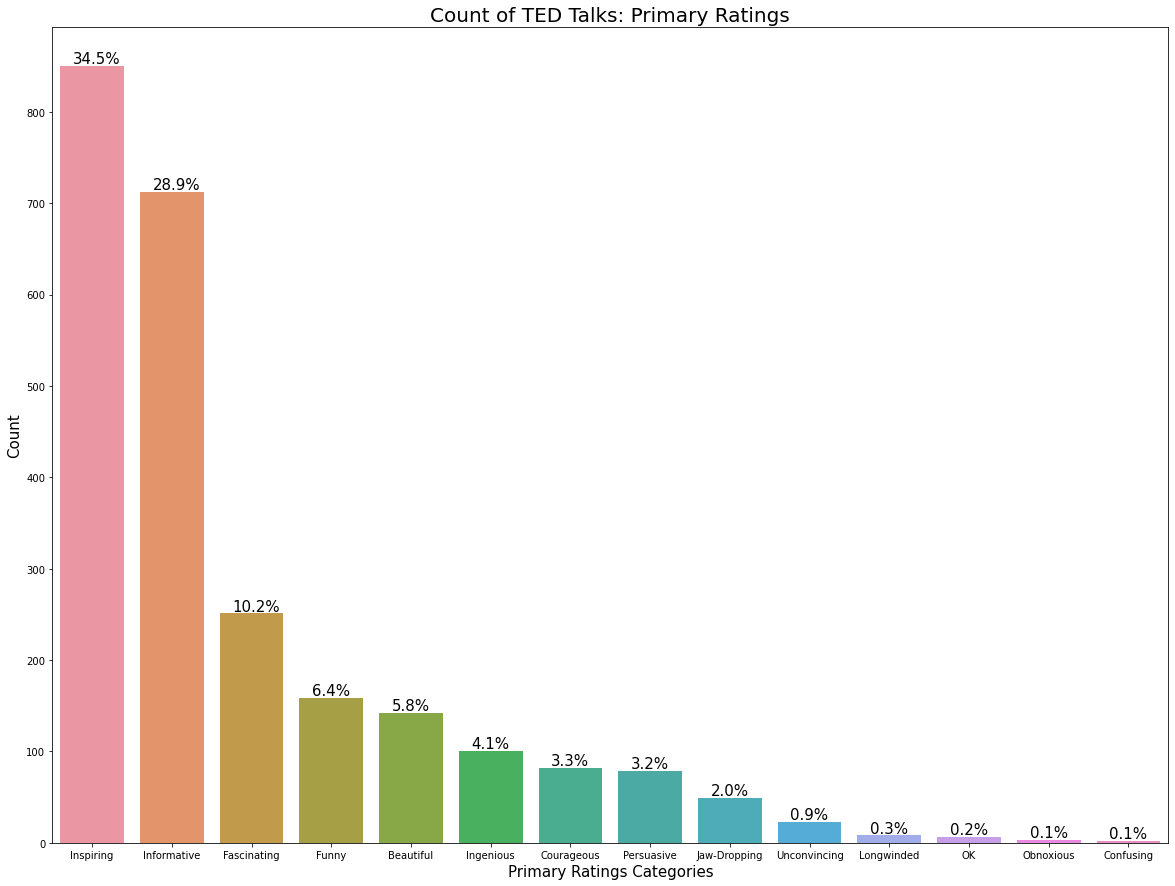

In [78]:
# Set plot dimensions
plt.figure(figsize = (20,15))

# Create countplot and assign to variable ax
ax = sns.countplot(x = TED_combined['Primary_Rating'], order = TED_combined['Primary_Rating'].value_counts().index);

# Update Title and Axes
plt.title('Count of TED Talks: Primary Ratings', fontdict = {'fontsize': 20})
plt.xlabel('Primary Ratings Categories', fontdict = {'fontsize': 15})
plt.ylabel('Count', fontdict = {'fontsize': 15})

# Run the above function for desired plot (ax) and input field
plotpercentage(ax, TED_combined['Primary_Rating'])

- Over 63% of talks are primarily rated as either **Inspiring (34.5%) or Informative (28.9%)**
- Conversely, **less than 1%** of all talks fall under the following 4 Rating Categories:
    - Longwinded (0.3%)
    - OK (0.2%)
    - Obnoxious (0.1%)
    - Confusing (0.1%)

#### Count by Most Popular (Speakers) TED Talk

In [79]:
# Create a top 10 event summary based on count of talks for each event
top_x_events = pd.DataFrame(TED_combined['Event'].value_counts()).head(10).reset_index()
top_x_events.columns = ['Event', '#_Talks']

# Examine the summary below
top_x_events

Event  #_Talks
0         TED2014       84
1         TED2009       81
2         TED2013       77
3         TED2016       75
4         TED2015       75
5  TEDGlobal 2012       70
6         TED2011       70
7         TED2010       68
8  TEDGlobal 2011       68
9         TED2007       68

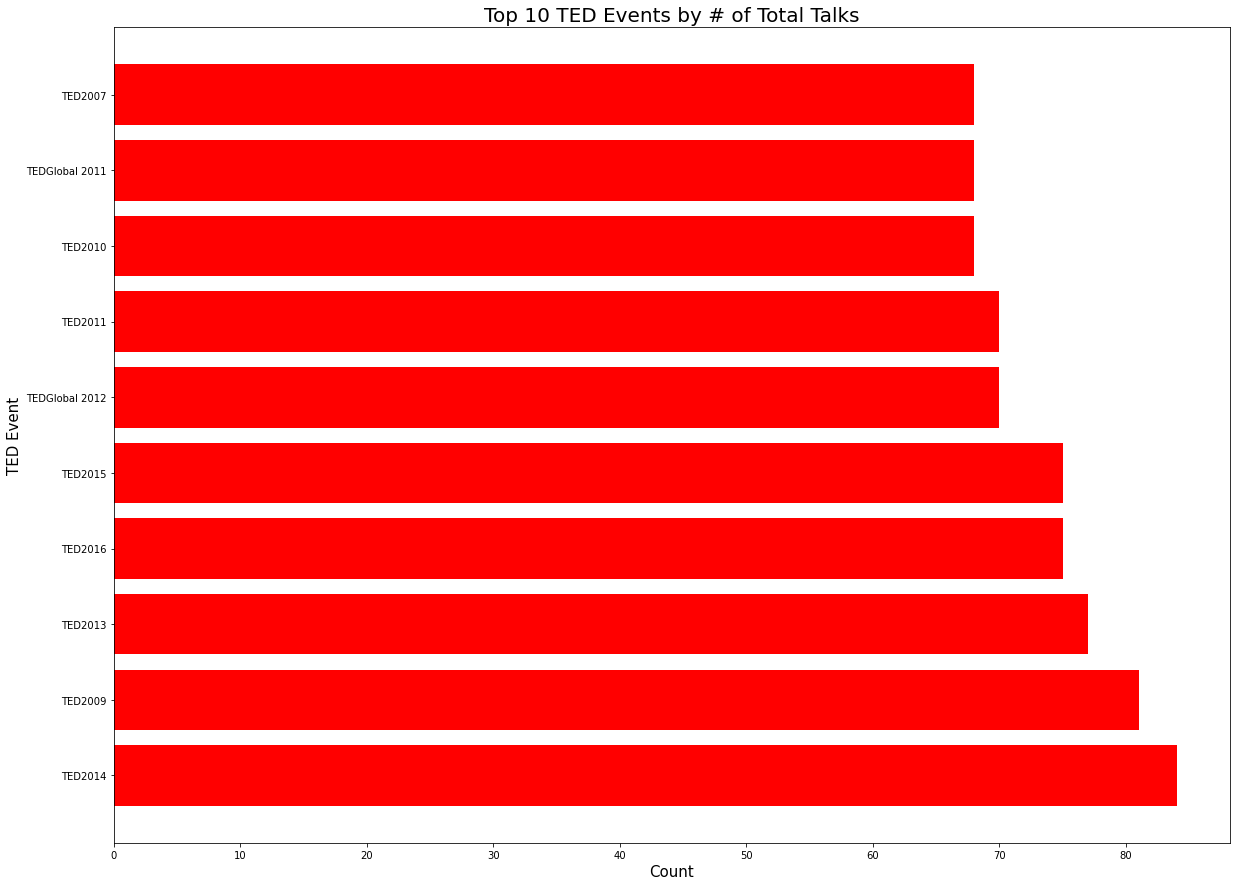

In [80]:
# Set plot dimensions
plt.figure(figsize = (20, 15))

# Create a barplot, for the top 10 events bases on # of talks (red)
plt.barh(y = top_x_events['Event'], width = top_x_events['#_Talks'], color = 'r')

# Update Title and Axes
plt.title('Top 10 TED Events by # of Total Talks', fontdict = {'fontsize': 20})
plt.xlabel('Count', fontdict = {'fontsize': 15})
plt.ylabel('TED Event', fontdict = {'fontsize': 15});

- The most popular event, as it relates to number of talks hosted, was **TED2014, closely followed by TED2009**

#### Count by Least Popular (Speakers) TED Talk

In [81]:
# Create a top 10 event summary based on count of talks for each event
least_x_events = pd.DataFrame(TED_combined['Event'].value_counts().tail(10)).reset_index()
least_x_events.columns = ['Event', '#_Talks']

# Examine the summary below
least_x_events

Event  #_Talks
0          TEDxGlasgow        1
1       TEDxGeorgetown        1
2     TEDxGatewayWomen        1
3  TEDxFulbrightDublin        1
4        TEDxFrankfurt        1
5        TEDxFiDiWomen        1
6           TEDxEuston        1
7         TEDxEdmonton        1
8          TEDxEastEnd        1
9   Arbejdsglaede Live        1

There appear to be many single talk TED events hosted.  To better determine the extent of low volume TED talks, as it relates to individual events, we can view the overall count of events with less than: 1, 5, and 10 TED talks vs. the entire Event list. 

In [82]:
# Rerun the event summary, no bottom 10 limit, based on count of talks for each event
least_x_events = pd.DataFrame(TED_combined['Event'].value_counts()).reset_index()
least_x_events.columns = ['Event', '#_Talks']

# Count the total event entries with <= 1, 5, 10 talks per event and print a summary below
print('Events with {} or fewer total talks: {}'.format(1, least_x_events[least_x_events['#_Talks'] <= 1].count()[1]))
print('')
print('Events with {} or fewer total talks: {}'.format(5, least_x_events[least_x_events['#_Talks'] <= 5].count()[1]))
print('')
print('Events with {} or fewer total talks: {}'.format(10, least_x_events[least_x_events['#_Talks'] <= 10].count()[1]))
print('')
print('Collective % of events with {} or fewer total talks: {}%'.format(10, 
                    round(least_x_events[least_x_events['#_Talks'] <= 10].count()[1] / TED_combined['Event'].count() * 100,1)))

Events with 1 or fewer total talks: 140

Events with 5 or fewer total talks: 236

Events with 10 or fewer total talks: 276

Collective % of events with 10 or fewer total talks: 11.2%


In [83]:
least_x_events

Event  #_Talks
0               TED2014       84
1               TED2009       81
2               TED2013       77
3               TED2016       75
4               TED2015       75
..                  ...      ...
315       TEDxFiDiWomen        1
316          TEDxEuston        1
317        TEDxEdmonton        1
318         TEDxEastEnd        1
319  Arbejdsglaede Live        1

[320 rows x 2 columns]

In [84]:
TED_combined['Event'].sort_values(ascending = True).value_counts()

TED2014               84
TED2009               81
TED2013               77
TED2016               75
TED2015               75
                      ..
TEDxFiDiWomen          1
TEDxEuston             1
TEDxEdmonton           1
TEDxEastEnd            1
Arbejdsglaede Live     1
Name: Event, Length: 320, dtype: int64

- There were numerous TED events with fewer than 10 total talks, some having only 1 unique talk/speaker
    - 1 talk per event - 140
    - 5 or fewer talks per event - 236
    - 10 or fewer talks per event - 276
    - **% of Events with 10 or fewer talks - 11%**

#### Cumulative Count of TED Talks by Year

It is easier to analyze the annual talks by **stripping out just the Year out of the full DateTime** information within the Film Date (or Published Date) columns.  A new column can be built and added to the DataFrame for easier analysis.

In [85]:
# Create empty list of years from the full Film Date DateTime string
Year = []

for i in range(0, len(TED_combined['Film_Date'])):
    year_summ = str(TED_combined['Film_Date'][i]).split('-')[0]
    Year.append(year_summ)
    
#  Create new DataFrame field from the above list
TED_combined['Year'] = Year

# Examine the top row of data to ensure the Year variable is correctly aligned
TED_combined.head(1)

Comments  \
0      4553   

                                                                                           Description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education syst...   

   Duration    Event  Film_Date  Languages  Main_Speaker Published_Date  \
0      19.4  TED2006 2006-02-25         60  Ken Robinson     2006-02-25   

                                                                                               Ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id...   

  Speaker_Occupation  \
0    Author/educator   

                                                                     Tags  \
0  [children, creativity, culture, dance, education, parenting, teaching]   

                         Title  Views  \
0  Do schools kill creativity?  47.23   

                                                                                            Transcript  \
0  Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whol...   

   Sentence_Cnt  Character_Cnt  Word_Cnt  Words_Per_Sent   Funny  Beautiful  \
0           191          14344      3066           16.05  0.2093     0.0487   

   Ingenious  Courageous  Longwinded  Confusing  Informative  Fascinating  \
0     0.0647      0.0347      0.0041     0.0026       0.0783       0.1127   

   Unconvincing  Persuasive  Jaw-Dropping      OK  Obnoxious  Inspiring  \
0        0.0032      0.1141        0.0473  0.0125     0.0022     0.2656   

   Total_Ratings_(%)  Total_Ratings Primary_Rating  Year  
0                1.0          93850      Inspiring  2006

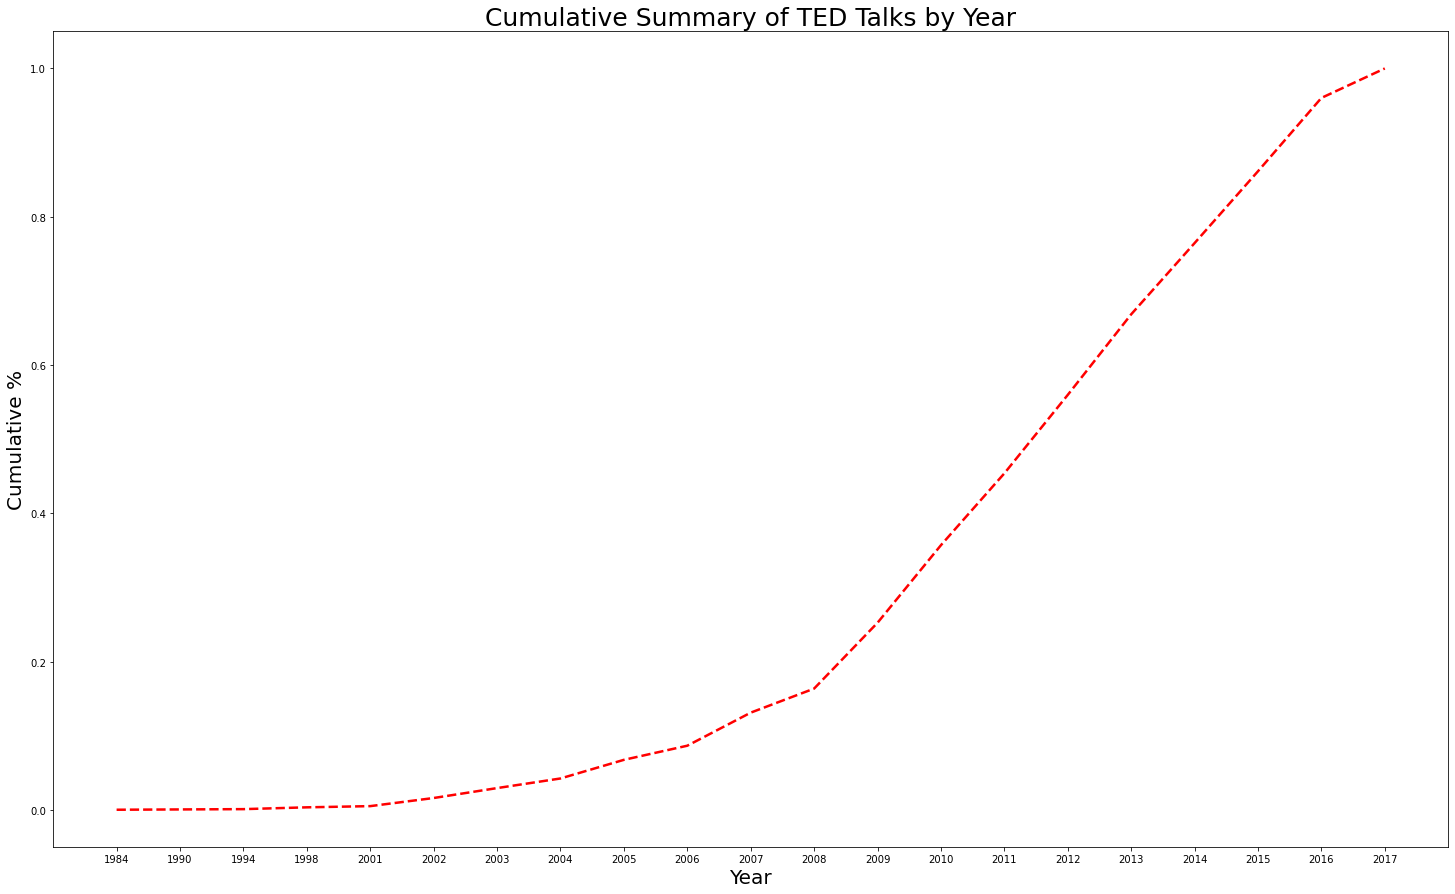

In [86]:
# Count the % counts, by year, vs. the overall count of talks and plot a cumulative distribution summary
plt.figure(figsize = (25, 15))
cumulative = np.cumsum((TED_combined['Year'].value_counts()/TED_combined['Year'].count()).sort_index())
plt.plot(cumulative, color = 'red', linestyle =  '--', linewidth = 2.5);

# Update Title and Axes
plt.title("Cumulative Summary of TED Talks by Year", fontdict = {'fontsize': 25})
plt.xlabel("Year", fontdict = {'fontsize': 20})
plt.ylabel("Cumulative %", fontdict = {'fontsize': 20});

In [87]:
print(str(5) + '%')

5%


In [88]:
# Print the cumulative summary, by year, of TED talks
print("Cumulative % of Talks by Year:\n")
print(str(100 * round(np.cumsum((TED_combined['Year'].value_counts()/TED_combined['Year'].count()).sort_index()),3)))

print('')
print("Last Date in Dataset: {}".format(str(TED_combined['Film_Date'].max()).split()[0]))

Cumulative % of Talks by Year:

1984      0.0
1990      0.1
1994      0.1
1998      0.4
2001      0.5
2002      1.6
2003      3.0
2004      4.3
2005      6.8
2006      8.7
2007     13.1
2008     16.4
2009     25.3
2010     35.7
2011     45.4
2012     56.0
2013     66.8
2014     76.4
2015     86.1
2016     96.0
2017    100.0
Name: Year, dtype: float64

Last Date in Dataset: 2017-08-27


- 50% of the overall TED talks in the sample dataset occurred from 1984 to between 2011/2012 (roughly 28 years), whereas there is a **strong ramp-up from 2012 through partial 2017 (5 years) for the remaining 50% of TED Talks**

#### Histogram of Talks by Film Year (by Primary Rating)

In [89]:
# Create Histogram for total talks by Film Year and the target variable (Primary Rating)
fig = px.histogram(TED_combined['Year'], x = TED_combined['Year'].sort_values(ascending = True), 
                   histnorm = 'percent', marginal = 'box')

# Update the Title and Axes names
fig.update_layout(title_text = "Histogram of TED Talks by Summary Year: Primary Rating Split", 
                  xaxis_title = 'Year', yaxis_title = 'Count')
fig.show()

In [90]:
# Print summary of Min/Max years and the overall range
print("Years Range: {}".format(int(TED_combined['Year'].max()) - int(TED_combined['Year'].min())))
print('')
print("Min Year: {}".format(int(TED_combined['Year'].min())))
print("Min Year: {}".format(int(TED_combined['Year'].max())))
print('')
print("Last Date in Dataset: {}".format(str(TED_combined['Film_Date'].max()).split()[0]))

Years Range: 33

Min Year: 1984
Min Year: 2017

Last Date in Dataset: 2017-08-27


- Over the 33 years of TED talks, **ranging from 1984 to 2017 (partial through 8/27/17)**, the majority of Talks fall in the years of 2013, 2012, and 2010 comprising of 10.9%, 10.6%, and 10.5% respectively
- Outliers exist on the lower end of the data, before 2002, with 1984, 1990, and 1994 only having 1 TED talk each

In [91]:
# Filter on the first 3 TED Talks ever filmed
TED_combined[['Title', 'Main_Speaker']][TED_combined['Film_Date'] <= '1995-01-01']

Title         Main_Speaker
197       5 predictions, from 1984  Nicholas Negroponte
199       My days as a young rebel          Frank Gehry
1074  Back to the future (of 1994)         Danny Hillis

- The years of: **1984 (first talk)**, 1990, and 1995 each had only 1 TED Talk:
    - **1984: 5 Predictions from 1984 by Nicholas Negroponte**
    - 1990: My days as a young rebel by Frank Gehry
    - 1994: Back to the future (of 1994) by Danny Hillis
- **2012 had the largest overall count of TED Talks, closely followed by 2013**
- There is a steep drop off in TED talks for 2017, **due to reporting ceasing within that year**, and should be ignored for purposes of this analysis

#### Top 10 Speaker Occupations

In [92]:
speaker_occupations = pd.DataFrame(TED_combined['Speaker_Occupation'].value_counts().head(10).reset_index())
speaker_occupations.columns = ['Occupation', '#_Speakers']

fig1 = px.bar(speaker_occupations, x = 'Occupation', y = '#_Speakers', title = 'Top 10 Speaker Occupations')
fig1.show()

fig2 = px.pie(speaker_occupations, values = '#_Speakers', names = 'Occupation', title = 'Top 10 Speaker Occupations')
fig2.show()

Of the top 10 Speaker Occupations sampled, **Writers make up almost 15% of the entire speaker segment**, followed by Journalists (12%) and Artists/Designers (each at 11%).

### Bivariate

#### Distribution of Views (< 2M) by Primary Rating

In [93]:
# Examine statistical summary for Views
TED_combined['Views'].describe()

count    2467.000000
mean        1.740170
std         2.527192
min         0.160000
25%         0.790000
50%         1.150000
75%         1.740000
max        47.230000
Name: Views, dtype: float64

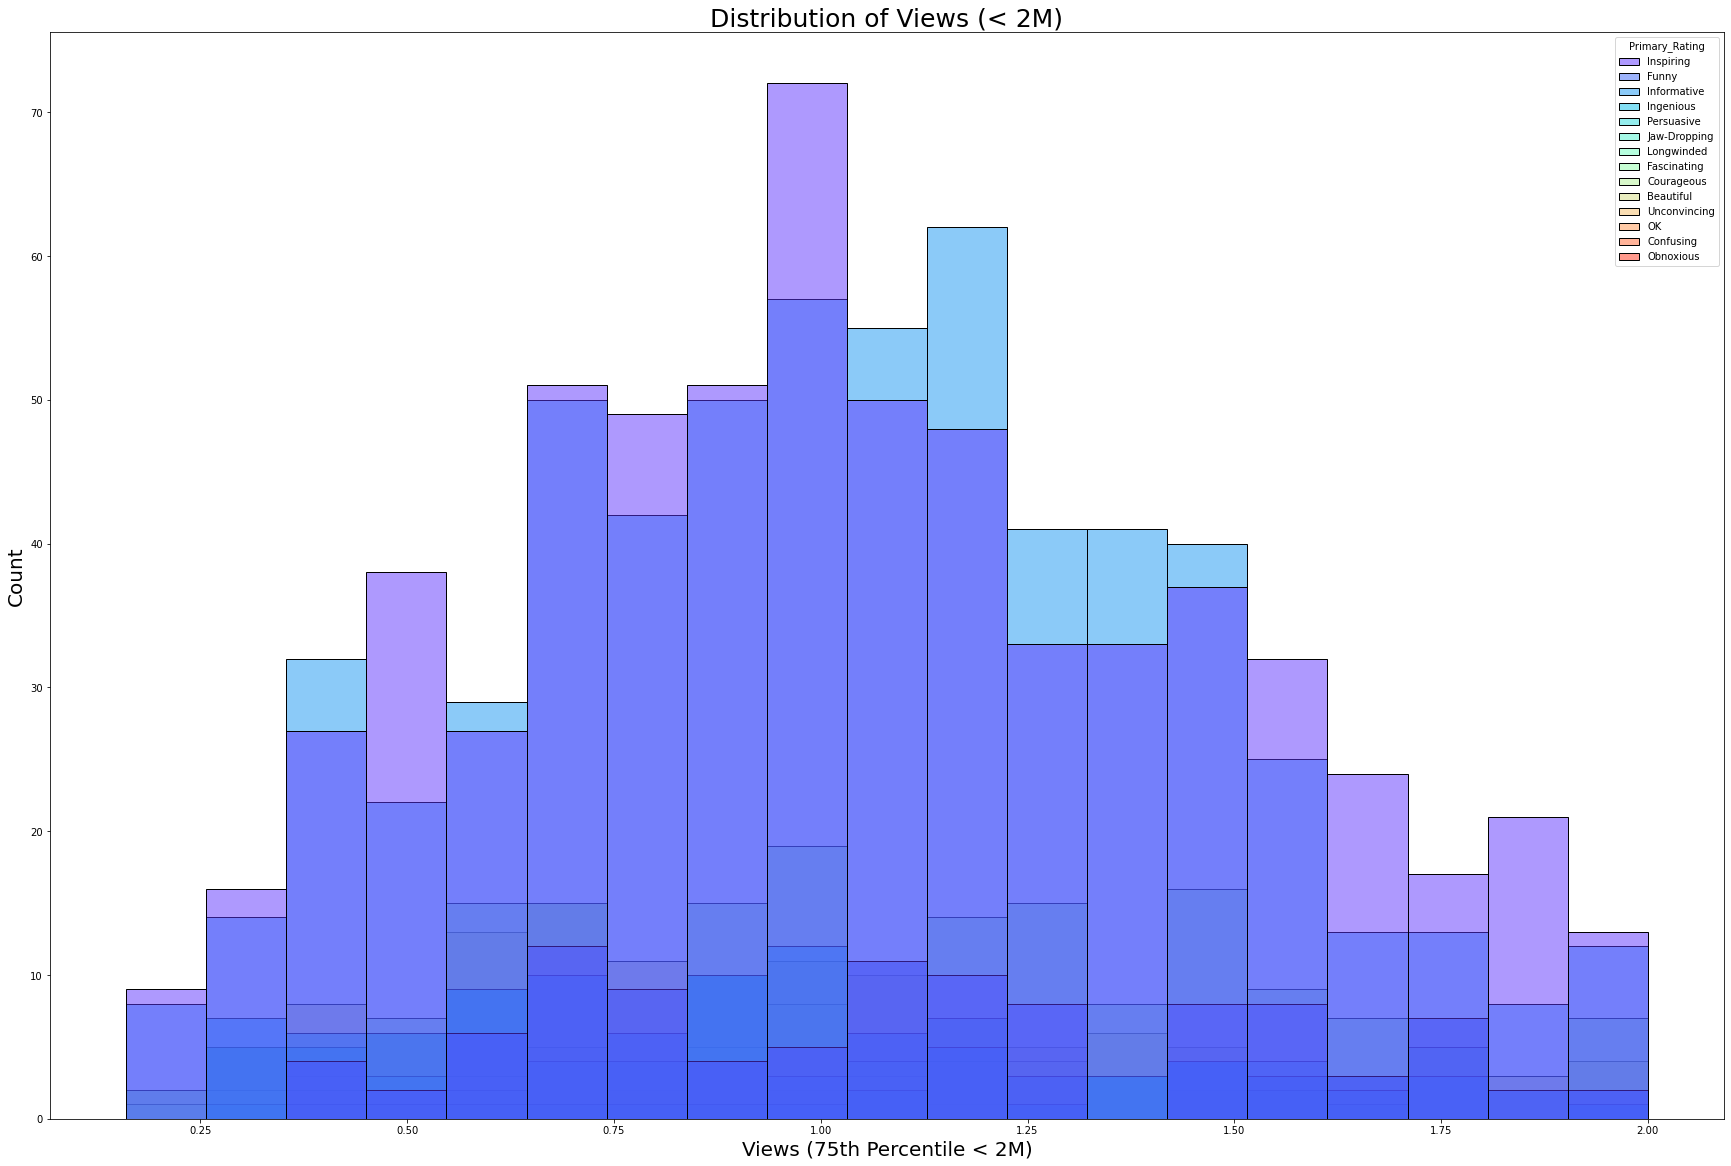

In [94]:
# Set plot dimensions
plt.figure(figsize = (30,20))

# Plot Histplot for Views under 2M (roughly 75% of dataset)
sns.histplot(x = TED_combined['Views'][TED_combined['Views'] <= 2], hue = TED_combined['Primary_Rating'],
                                                     palette = 'rainbow');

# Update Title and Axes
plt.title('Distribution of Views (< 2M)', fontdict = {'fontsize': 25})
plt.xlabel('Views (75th Percentile < 2M)', fontdict = {'fontsize': 20})
plt.ylabel('Count', fontdict = {'fontsize': 20});

- The majority of views, excluding outliers removed, fall within the range of 160k (min) and 1.74M (75th Quantile)
- Most talks fall under the Primary Rating categories: Inspiring, Funny, or Informative

#### Are Film Date & Published Date Equal?
With **TED talks occuring live and being recorded and published usually within the same day**, it should stand to reason that the Film Date and Published Date are equal.  It is worth building a plot to confirm this assumption.

In [95]:
# Create Line Plot of both years - should be perfect line
fig = px.line(TED_combined, x = 'Film_Date', y = 'Published_Date', markers = True)

# Update plot title & show
fig.update_layout(title_text = "Film Date vs. Published Date (100% Correlation)",
                 xaxis_title = 'Film Date', yaxis_title = 'Published Date')
fig.show()

- The plot above confirms that **Film Date and Published Date are equivalent - every TED talk is filmed live and published online that same day** (possibly same time if immediately published after recording)
- There is a **ramp-up in frequency of annual talks hosted per year from around 2008 onwards**

#### Rating Column Distributions - Total Ratings/Comments/Views

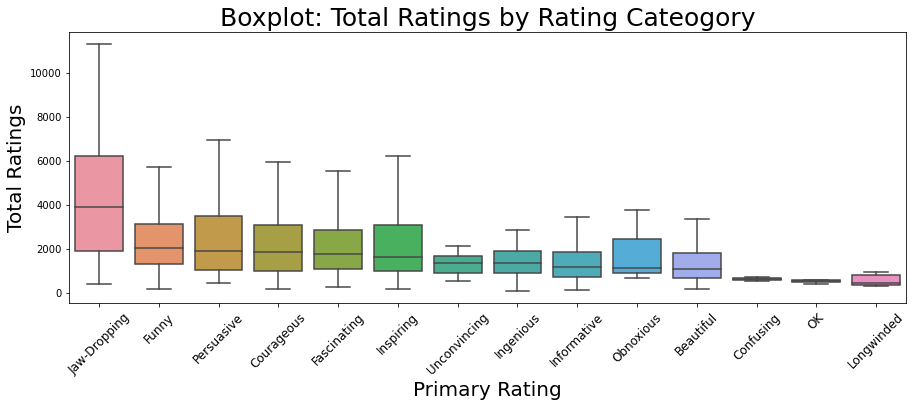

In [96]:
# Sort boxes by highest Median in Descending order
box_sorted = TED_combined['Total_Ratings'].groupby(TED_combined['Primary_Rating']).median().sort_values(ascending = False).index

# Plot Boxplot for all Rating Categories and respective Total Ratings
plt.figure(figsize = (15,5))
sns.boxplot(data = TED_combined, x = 'Primary_Rating', y = 'Total_Ratings', orient = 'v', 
            order = box_sorted, showfliers = False) # Remove outliers
            
# Adjust Axis Rotations & Sizes            
plt.xticks(rotation = 45, fontsize = 12)

# Update Title and Axes
plt.title("Boxplot: Total Ratings by Rating Cateogory", fontdict = {'fontsize': 25})
plt.xlabel("Primary Rating", fontdict = {'fontsize': 20})
plt.ylabel("Total Ratings", fontdict = {'fontsize': 20});

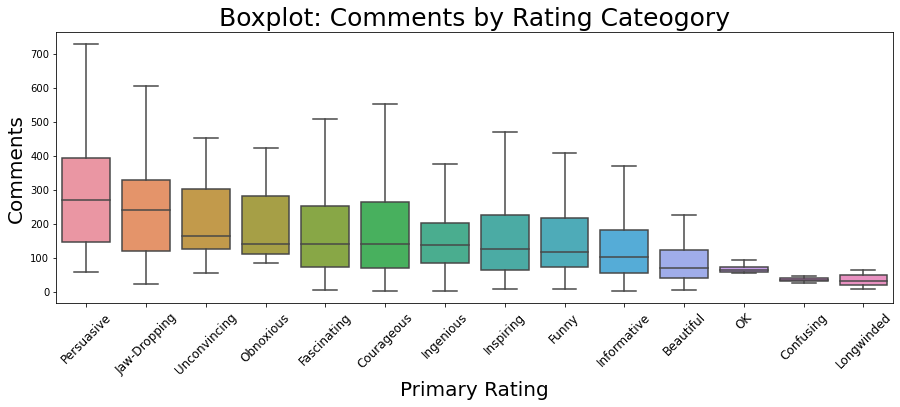

In [97]:
# Sort boxes by highest Median in Descending order
box_sorted = TED_combined['Comments'].groupby(TED_combined['Primary_Rating']).median().sort_values(ascending = False).index

# Plot Boxplot for all Rating Categories and respective Comments
plt.figure(figsize = (15,5))
sns.boxplot(data = TED_combined, x = 'Primary_Rating', y = 'Comments', orient = 'v', 
            order = box_sorted, showfliers = False) # Remove outliers

# Adjust Axis Rotations & Sizes            
plt.xticks(rotation = 45, fontsize = 12)

# Update Title and Axes
plt.title("Boxplot: Comments by Rating Cateogory", fontdict = {'fontsize': 25})
plt.xlabel("Primary Rating", fontdict = {'fontsize': 20})
plt.ylabel("Comments", fontdict = {'fontsize': 20});

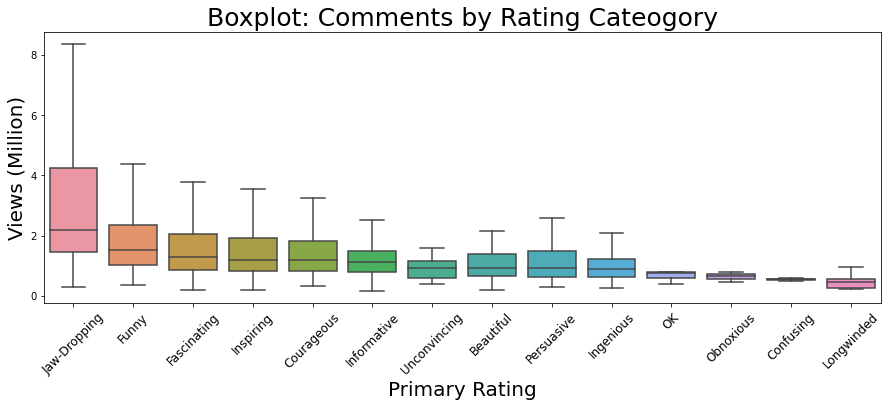

In [98]:
# Sort boxes by highest Median in Descending order
box_sorted = TED_combined['Views'].groupby(TED_combined['Primary_Rating']).median().sort_values(ascending = False).index

# Plot Boxplot for all Rating Categories and respective Comments
plt.figure(figsize = (15,5))
sns.boxplot(data = TED_combined, x = 'Primary_Rating', y = 'Views', orient = 'v', 
            order = box_sorted, showfliers = False) # Remove outliers

# Adjust Axis Rotations & Sizes            
plt.xticks(rotation = 45, fontsize = 12)

# Update Title and Axes
plt.title("Boxplot: Comments by Rating Cateogory", fontdict = {'fontsize': 25})
plt.xlabel("Primary Rating", fontdict = {'fontsize': 20})
plt.ylabel("Views (Million)", fontdict = {'fontsize': 20});

- In general, there are **substantially more positive Rating Categories (9 vs. 5)**
- The majority of Ratings and Comments, particularly outliers are assigned to the **Inspiring** rating category
- Excluding outliers, the **Jaw-Dropping** category has the largest distribution of Ratings, and the **Persuasive** category has the largest distribution of Comments
- The categories for Longwinded, OK, and Confusing, has the lowest distribution of Total Ratings and Comments
    - This, in addition to the large distribution in positive categories, shows that **TED viewers opt to Rate/Comment on a Talk usually do so only usually only when creating a positive reaction for the viewer**
    - **One caveat to this is for talks rated as Obnoxious or Unconvincing**, which do appear to welcome further commentary and ratings form viewers - perhaps invoking stronger feelings and a call to respond
- Talks rated as **Jaw-Dropping have the highest overall views**, substantially higher than all other categories which are relatively similarly distributed
- Talks rated as **Longwinded accounted for the lowest counts for Total Ratings, Comments, and Views**

#### Sentence/Word Count and Words per Sentence by Primary Rating

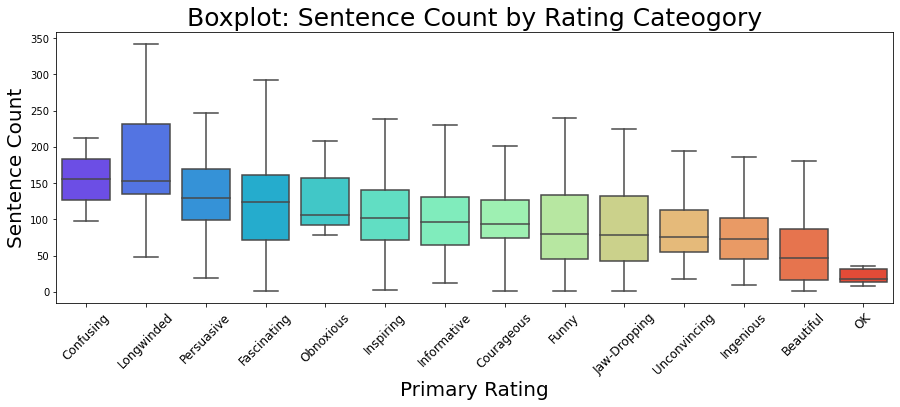

In [99]:
# Sort boxes by highest Median in Descending order
box_sorted = TED_combined['Sentence_Cnt'].groupby(TED_combined['Primary_Rating']).median().sort_values(ascending = False).index

# Plot Boxplot for all Rating Categories and respective Comments
plt.figure(figsize = (15,5))
sns.boxplot(data = TED_combined, x = 'Primary_Rating', y = 'Sentence_Cnt', orient = 'v', 
            order = box_sorted, showfliers = False, palette = 'rainbow') # Remove outliers

# Adjust Axis Rotations & Sizes            
plt.xticks(rotation = 45, fontsize = 12)

# Update Title and Axes
plt.title("Boxplot: Sentence Count by Rating Cateogory", fontdict = {'fontsize': 25})
plt.xlabel("Primary Rating", fontdict = {'fontsize': 20})
plt.ylabel("Sentence Count", fontdict = {'fontsize': 20});

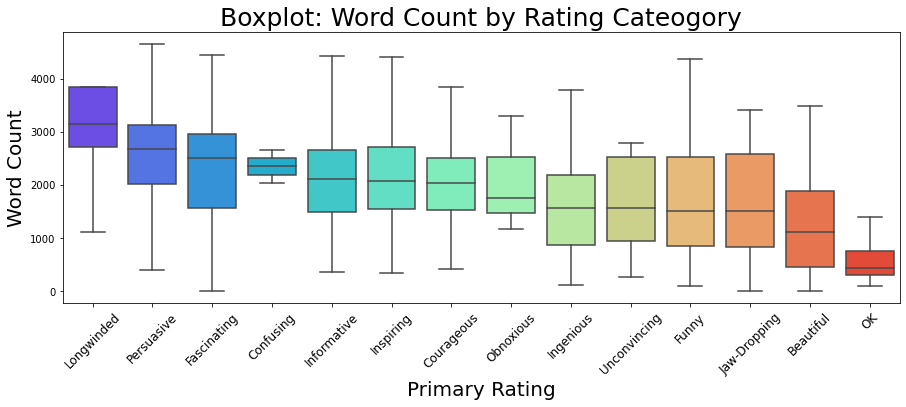

In [100]:
# Sort boxes by highest Median in Descending order
box_sorted = TED_combined['Word_Cnt'].groupby(TED_combined['Primary_Rating']).median().sort_values(ascending = False).index

# Plot Boxplot for all Rating Categories and respective Comments
plt.figure(figsize = (15,5))
sns.boxplot(data = TED_combined, x = 'Primary_Rating', y = 'Word_Cnt', orient = 'v', 
            order = box_sorted, showfliers = False, palette = 'rainbow') # Remove outliers

# Adjust Axis Rotations & Sizes            
plt.xticks(rotation = 45, fontsize = 12)

# Update Title and Axes
plt.title("Boxplot: Word Count by Rating Cateogory", fontdict = {'fontsize': 25})
plt.xlabel("Primary Rating", fontdict = {'fontsize': 20})
plt.ylabel("Word Count", fontdict = {'fontsize': 20});

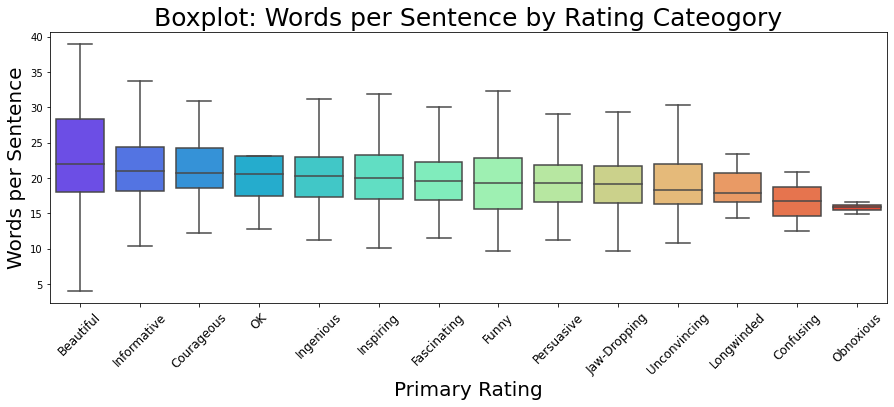

In [101]:
# Sort boxes by highest Median in Descending order
box_sorted = TED_combined['Words_Per_Sent'].groupby(TED_combined['Primary_Rating']).median().sort_values(ascending = False).index

# Plot Boxplot for all Rating Categories and respective Comments
plt.figure(figsize = (15,5))
sns.boxplot(data = TED_combined, x = 'Primary_Rating', y = 'Words_Per_Sent', orient = 'v', 
            order = box_sorted, showfliers = False, palette = 'rainbow') # Remove outliers

# Adjust Axis Rotations & Sizes            
plt.xticks(rotation = 45, fontsize = 12)

# Update Title and Axes
plt.title("Boxplot: Words per Sentence by Rating Cateogory", fontdict = {'fontsize': 25})
plt.xlabel("Primary Rating", fontdict = {'fontsize': 20})
plt.ylabel("Words per Sentence", fontdict = {'fontsize': 20});

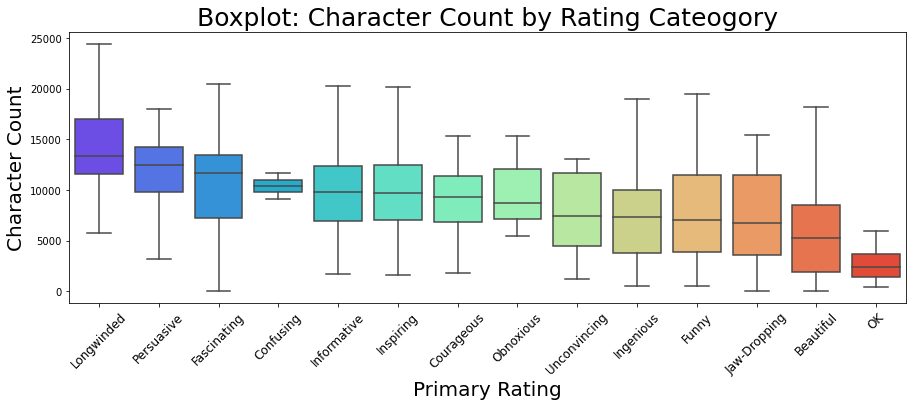

In [102]:
# Sort boxes by highest Median in Descending order
box_sorted = TED_combined['Character_Cnt'].groupby(TED_combined['Primary_Rating']).median().sort_values(ascending = False).index

# Plot Boxplot for all Rating Categories and respective Comments
plt.figure(figsize = (15,5))
sns.boxplot(data = TED_combined, x = 'Primary_Rating', y = 'Character_Cnt', orient = 'v', 
            order = box_sorted, showfliers = False, palette = 'rainbow') # Remove outliers

# Adjust Axis Rotations & Sizes            
plt.xticks(rotation = 45, fontsize = 12)

# Update Title and Axes
plt.title("Boxplot: Character Count by Rating Cateogory", fontdict = {'fontsize': 25})
plt.xlabel("Primary Rating", fontdict = {'fontsize': 20})
plt.ylabel("Character Count", fontdict = {'fontsize': 20});

Although **Sentence and Word counts are assumed to be highly correlated for each respective talk**, it is worth further examining the general distribution of each in relation to Primary Rating classifications.
- **Talks classified as OK had the lowest counts for Sentences, Words, and Characters**
    - It seems to show that these talks needed further presentation/delivery in order to impress the audience, but also avoided appearing Longwinded or confusing through being too long
- **Longwinded talks, as the Rating suggests, carried the highest counts for Sentences, Words, and Characters**
    - However, these talks are closely followed by talks rated as Persuasive, Fascinating, and Informative
        - This is perhaps indicative of longer talks, up to a (reasonable) point, showing a greater likelihood of being positively classified
        - There appears to be a **fine line between effective distribution of a message and a Longwinded ramble that could lose audience attention and warrant a negative Primary Rating**

### Multivariate vs. Target

#### Total Ratings vs. Comments & Views (by Primary Rating)

In [103]:
# Create Scatter Plot for Total Ratings/Comments and the target variable (Primary Rating)
fig = px.scatter(TED_combined, x = 'Total_Ratings', y = 'Comments', color = 'Primary_Rating',
                 hover_data = ['Main_Speaker', 'Title'],
                labels = dict(Total_Ratings = "Total Ratings", Comments = "Comments", Primary_Rating = "Primary Rating"))

# Update plot title & show
fig.update_layout(title_text = "Total Ratings vs. Comments (by Primary Rating)")
fig.show()

#### Total Ratings vs. Views (by Primary Rating)

In [104]:
# Create Scatter Plot for Total Ratings/Comments and the target variable (Primary Rating)
fig = px.scatter(TED_combined, x = 'Views', y = 'Total_Ratings', color = 'Primary_Rating',
                 hover_data = ['Main_Speaker'],
                labels = dict(Comments = "Views", Total_Ratings = "Total Ratings", Primary_Rating = "Primary Rating"))

# Update plot title & show
fig.update_layout(title_text = "Views vs. Total Ratings (by Primary Rating)")
fig.show()

**Observations**
- There is a slight correlation between increased Rating counts and the amount of Views and Comments created for a given TED talk
- The top rated (quantity) talks are usually those **individually rated as Inspiring, namely the talk by Ken Robinson, Amy Cuddy, and Simon Sinek**
- One notable outlier having substantially higher comments but lower overall views and ratings, is **Militant Atheism by Richard Dawkins**
    -This talk which was primarily rated as Courageous

#### Total Ratings/Comments/Views vs. Talk Duration (by Primary Rating)

In [105]:
# Create Scatter Plot for Total Ratings/Duration and the target variable (Primary Rating)
fig = px.scatter(TED_combined, x = 'Total_Ratings', y = 'Duration', color = 'Primary_Rating',
                 hover_data = ['Title', 'Main_Speaker'],
                labels = dict(Total_Ratings = "Total Ratings", Duration = "Duration", Primary_Rating = "Primary Rating"))

# Update plot title & show
fig.update_layout(title_text = "Total Ratings vs. Duration (by Primary Rating)")
fig.show()

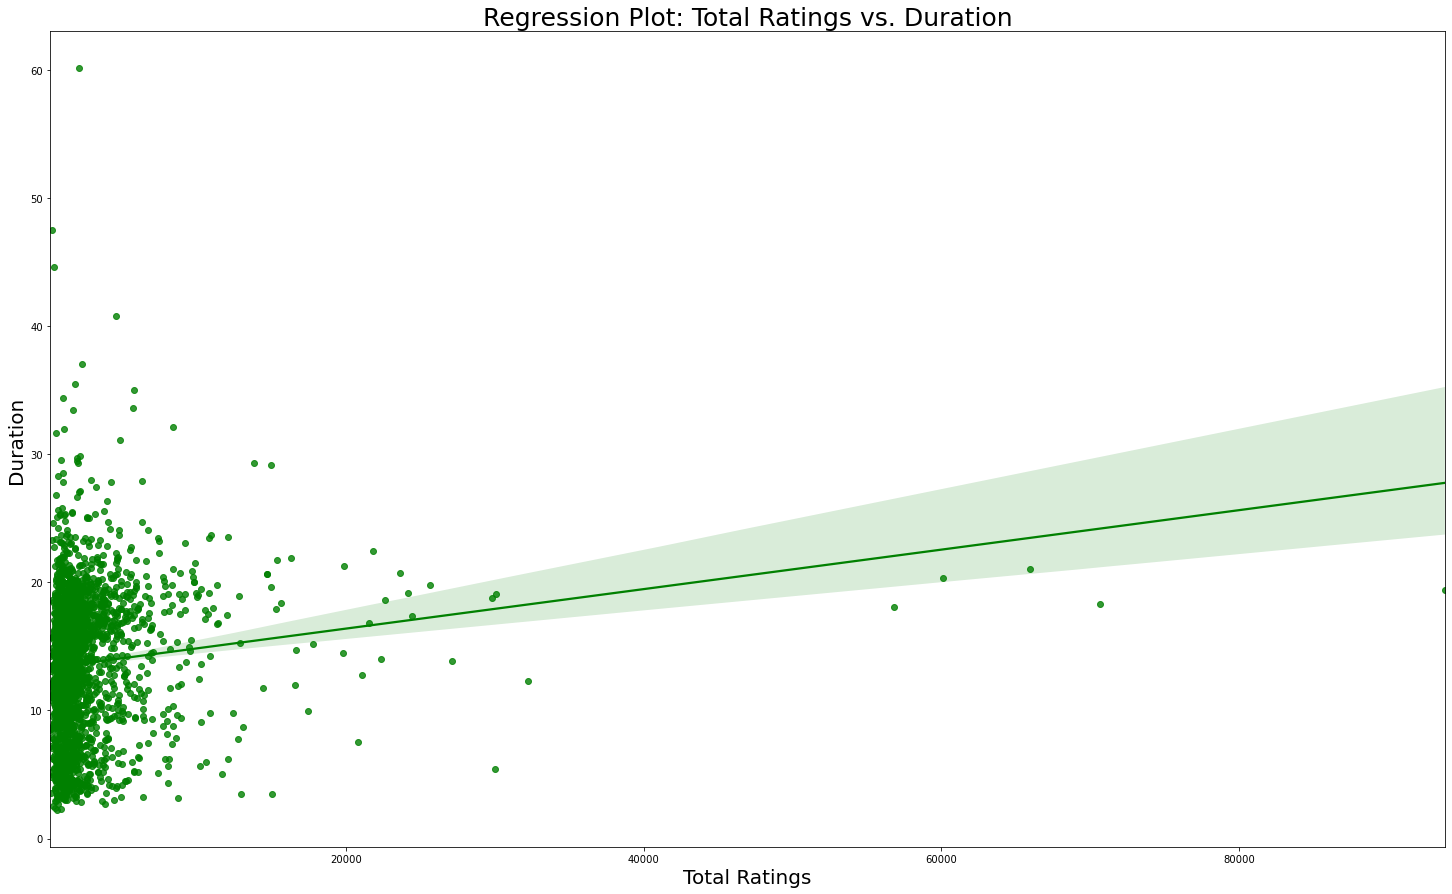

In [106]:
# Plot a regression plot for the relationship of Comments and Duration
plt.figure(figsize = (25,15))
sns.regplot(data = TED_combined, x = 'Total_Ratings', y = 'Duration', ci = 95, color = 'g', )

# Update Title and Axes
plt.title('Regression Plot: Total Ratings vs. Duration', fontdict = {'fontsize': 25})
plt.xlabel('Total Ratings', fontdict = {'fontsize': 20})
plt.ylabel('Duration', fontdict = {'fontsize': 20});

In [107]:
# Create Scatter Plot for Total Comments/Duration and the target variable (Primary Rating)
fig = px.scatter(TED_combined, x = 'Comments', y = 'Duration', color = 'Primary_Rating',
                 hover_data = ['Title', 'Main_Speaker'],
                labels = dict(Comments = "Comments", Duration = "Duration", Primary_Rating = "Primary Rating"))

# Update plot title & show
fig.update_layout(title_text = "Comments vs. Duration (by Primary Rating)")
fig.show()

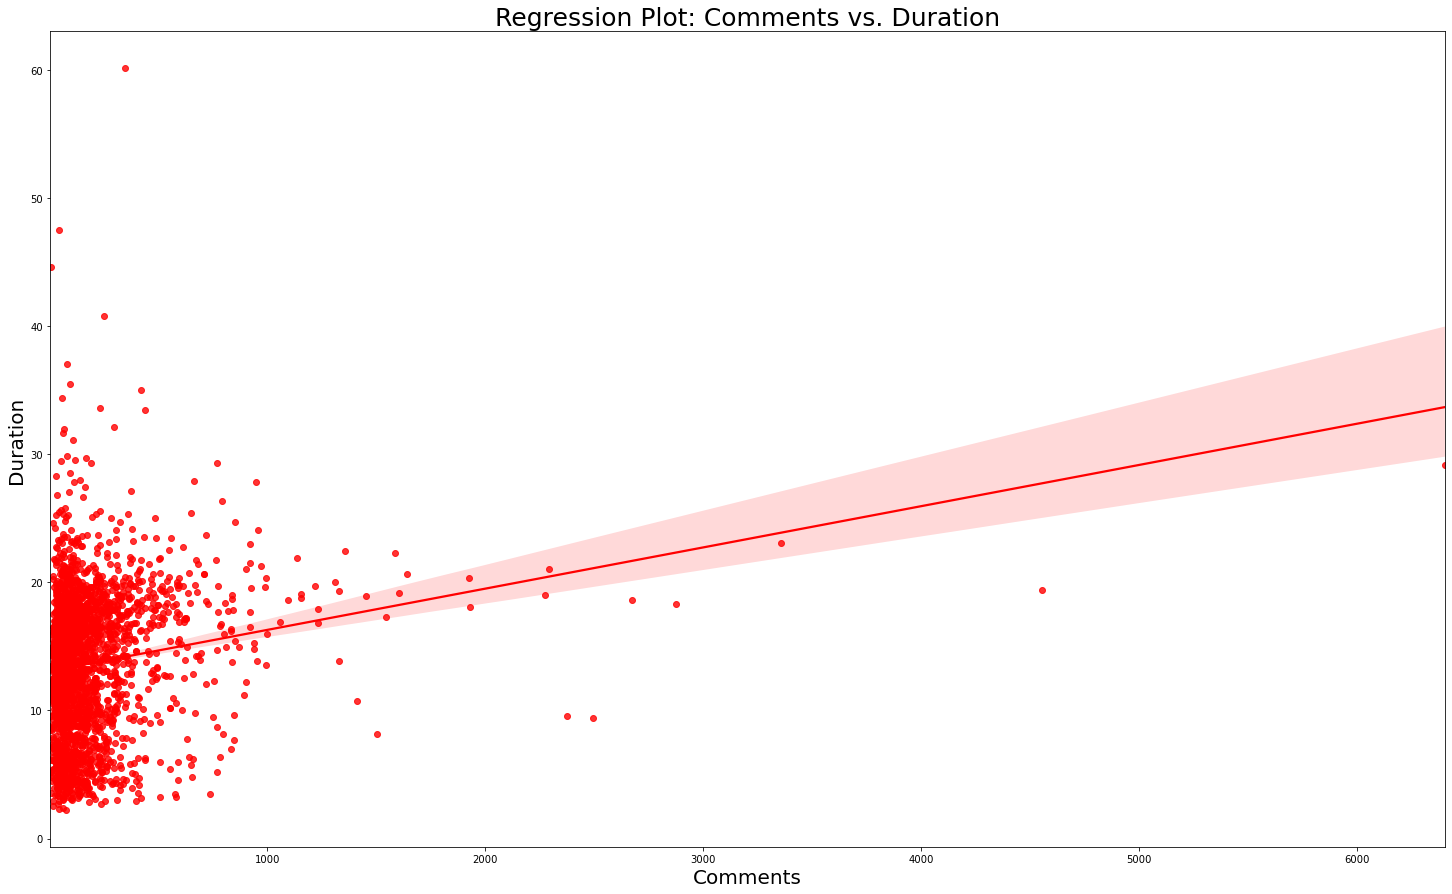

In [108]:
# Plot a regression plot for the relationship of Comments and Duration
plt.figure(figsize = (25,15))
sns.regplot(data = TED_combined, x = 'Comments', y = 'Duration', ci = 95, color = 'r')

# Update Title and Axes
plt.title('Regression Plot: Comments vs. Duration', fontdict = {'fontsize': 25})
plt.xlabel('Comments', fontdict = {'fontsize': 20})
plt.ylabel('Duration', fontdict = {'fontsize': 20});

In [109]:
# Create Scatter Plot for Total Comments/Duration and the target variable (Primary Rating)
fig = px.scatter(TED_combined, x = 'Views', y = 'Duration', color = 'Primary_Rating',
                 hover_data = ['Title', 'Main_Speaker'],
                labels = dict(Comments = "Views", Duration = "Duration", Primary_Rating = "Primary Rating"))

# Update plot title & show
fig.update_layout(title_text = "Views vs. Duration (by Primary Rating)")
fig.show()

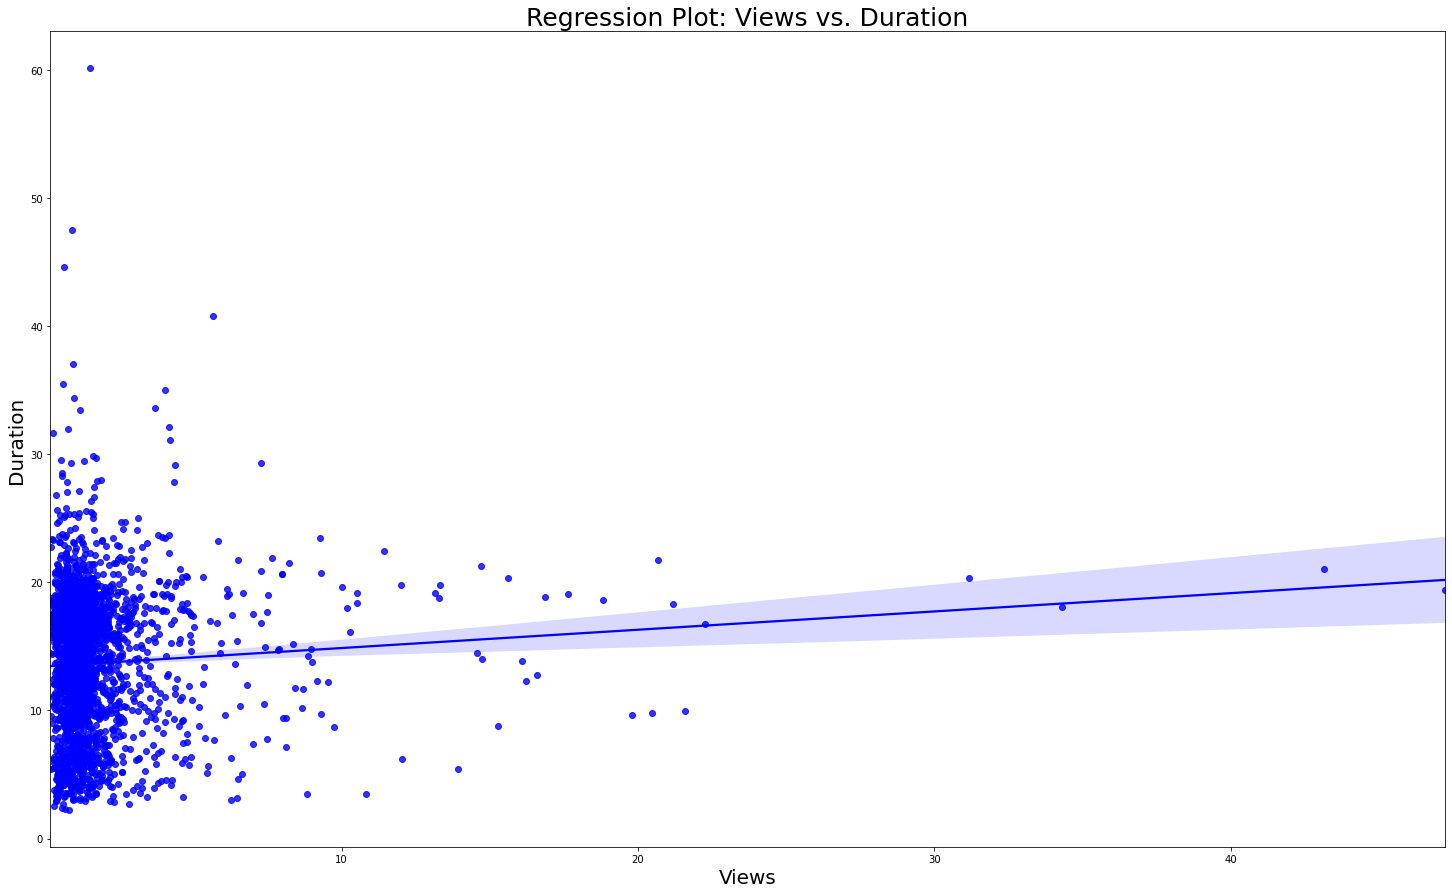

In [110]:
# Plot a regression plot for the relationship of Comments and Duration
plt.figure(figsize = (25,15))
sns.regplot(data = TED_combined, x = 'Views', y = 'Duration', ci = 95, color = 'b')

# Update Title and Axes
plt.title('Regression Plot: Views vs. Duration', fontdict = {'fontsize': 25})
plt.xlabel('Views', fontdict = {'fontsize': 20})
plt.ylabel('Duration', fontdict = {'fontsize': 20});

#### Views/Comments/Total Ratings/Languages vs. Primary Rating

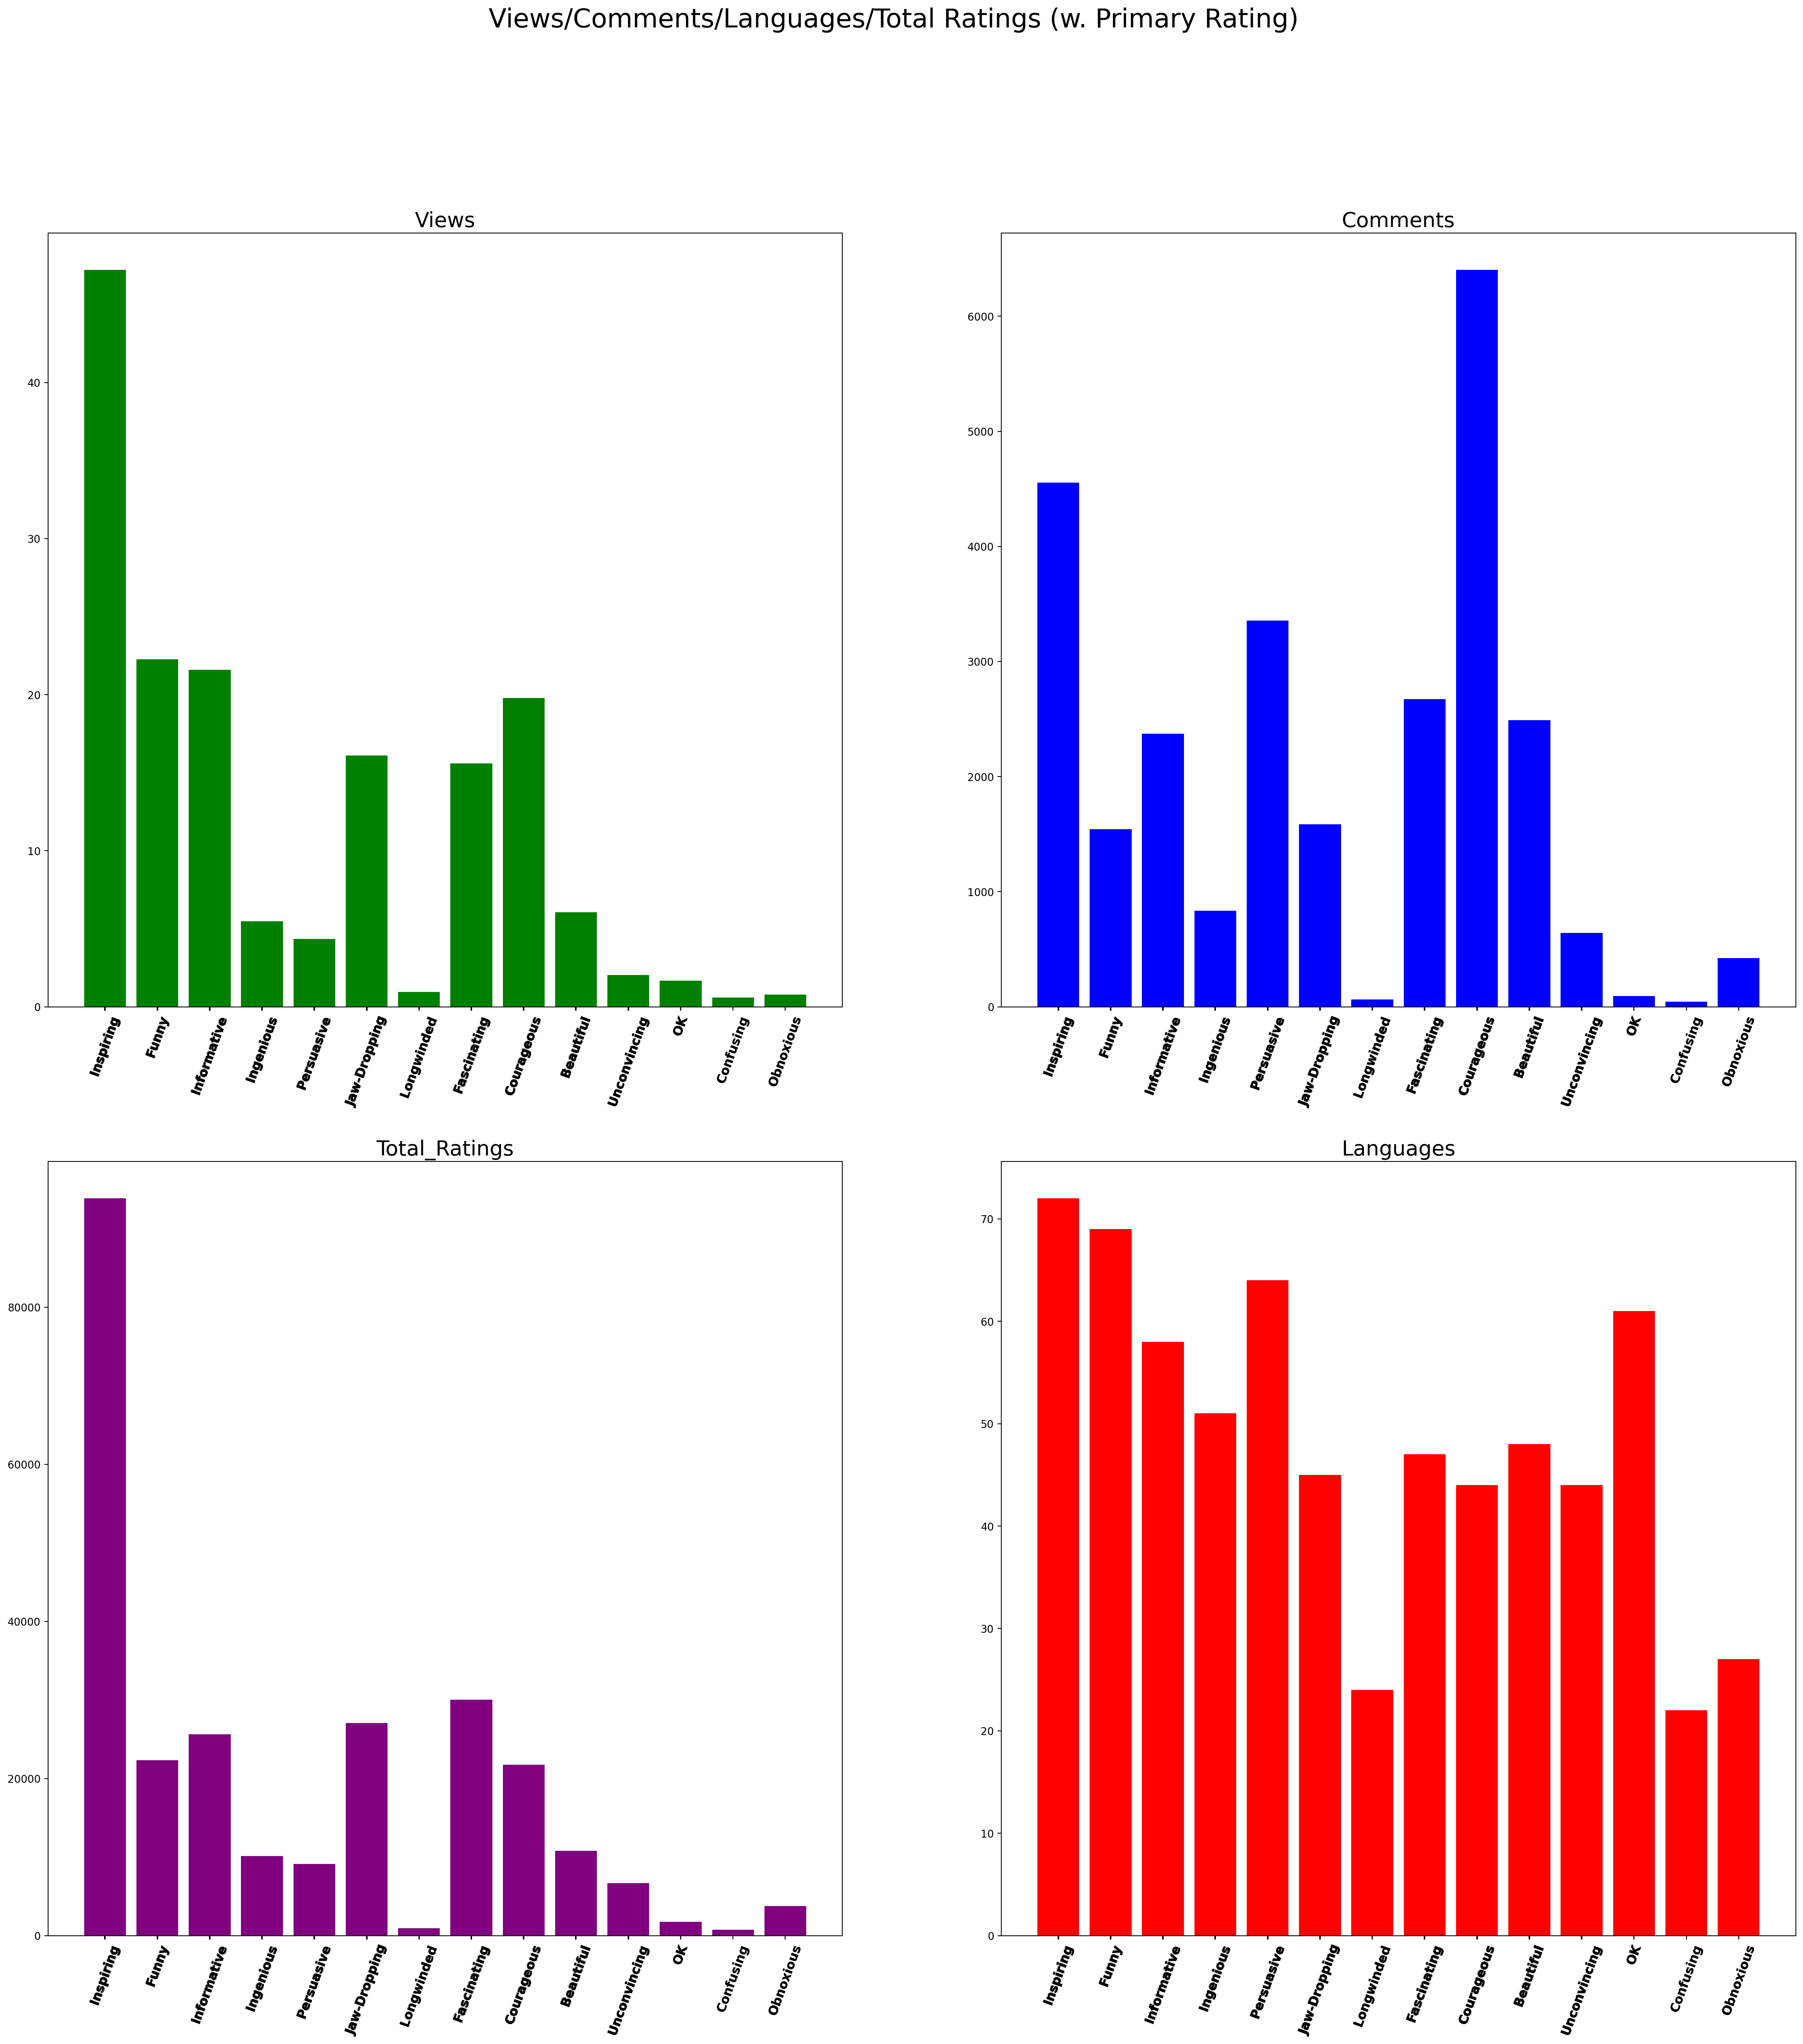

In [111]:
# Plot line chart for the relationship of Views, Comments and Total Ratings by Published Date
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (30,30), dpi = 200) # DPI increases pixelation quality
fig.suptitle('Views/Comments/Languages/Total Ratings (w. Primary Rating)', fontsize = 25)

# Set 3 Bar plots, keeping same X-axis
ax1.bar(x = TED_combined['Primary_Rating'], height = TED_combined['Views'], color = 'green')
ax2.bar(x = TED_combined['Primary_Rating'], height = TED_combined['Comments'], color = 'blue')
ax3.bar(x = TED_combined['Primary_Rating'], height = TED_combined['Total_Ratings'], color = 'purple')
ax4.bar(x = TED_combined['Primary_Rating'], height = TED_combined['Languages'], color = 'red')

# Set Common Titles
ax1.set_title('Views', fontsize = 20)
ax2.set_title('Comments', fontsize = 20)
ax3.set_title('Total_Ratings', fontsize = 20)
ax4.set_title('Languages', fontsize = 20)

# Set X-axis ticks to Primary Rating for each plot
ax1.set_xticks(TED_combined['Primary_Rating'], )
ax2.set_xticks(TED_combined['Primary_Rating'])
ax3.set_xticks(TED_combined['Primary_Rating'])
ax4.set_xticks(TED_combined['Primary_Rating'])

# Rotate X-axis 45 degrees
ax1.set_xticklabels(labels = TED_combined['Primary_Rating'], rotation = 70)
ax2.set_xticklabels(labels = TED_combined['Primary_Rating'], rotation = 70)
ax3.set_xticklabels(labels = TED_combined['Primary_Rating'], rotation = 70)
ax4.set_xticklabels(labels = TED_combined['Primary_Rating'], rotation = 70)


# Set X-axis ticks to bold and update font size
font_props = {'weight' : 'bold',
              'size'   : 12}
        
for a in [ax1, ax2, ax3, ax4]:
    for label in (a.get_xticklabels()):
        label.set_font(font_props)

- TED talks classified as **Inspiring show the highest count across almost all metrics, particularly Total Ratings**
    - However, talks classified as Courageous scored the highest Comment counts, followed by talks classified as Inspiring
- Regarding Languages (count), talks classified as: **Confusing, Longwinded, or Obnoxious had substantially lower unique language counts**, with Inspiring, Funny, Persuasive, and OK talks having the highest counts, respectively
- Views and Total Ratings appear to have similar distribution patterns, with Views having more proportionately, as expected since **not everyone who watches a talk will submit a rating**
    - Comments show less of a direct pattern as **certain viewers may be particularly moved by a talk, positively or negatively, and feel compelled to comment, regardless of overall views for that talk**

In [112]:
# Examine the statistical summary of the Duration column
TED_combined['Views'].describe()

count    2467.000000
mean        1.740170
std         2.527192
min         0.160000
25%         0.790000
50%         1.150000
75%         1.740000
max        47.230000
Name: Views, dtype: float64

In [113]:
# Examine the statistical summary of the Duration column
TED_combined['Duration'].describe()

count    2467.000000
mean       13.695975
std         5.568189
min         2.250000
25%         9.700000
50%        14.200000
75%        17.450000
max        60.130000
Name: Duration, dtype: float64

- The average TED talk was just under 14 minutes long, with the **maximum length being 1 hour and the minimum being just 2.5 minutes long**
    - Min: The Ancestor of Language by Murray Gell-Mann at the TED2007 event (2.5 minutes)
    - Max: Nationalism vs. Globalism: The New Political Divide by Yuval Noah Harari at the TED Dialogues event (60 minutes)
- The top 5 most rated TED talks had a duration ranging from 18 to 21 minutes, vs. an average of 14 minutes
- The top 3 most commented TED talks fall within the roughly **20 to 30 minute duration, well above the average of around 14 minutes**
    - Militant Atheism by Richard Dawkins at 29 minutes
    - Do Schools Kill Creativity by Sir Ken Robinson at 19 minutes
    - Science can Answer Moral Questions by Sam Harris at 23 minutes
- **Both Comments and Total Ratings have a positive correlation to Duration**, with Comments have a slightly stronger correlation (higher slope)
    - There is a slight positive correlation between Views and talk Duration with the large majority of talks having a low view count of less than
    - **75% of talks have total views of 1.75M, with the maximum views of 47.2M (Do Schools Kill Creativity by Sir Ken Robinson) largely skewing the dataset**

## Label Encode Primary Rating (Target)

#### Label Encode Primary Rating Column

In [114]:
# Inspect all unique categories in target column - to be changed to non-ordinal numeric
TED_combined['Primary_Rating'].unique()

array(['Inspiring', 'Funny', 'Informative', 'Ingenious', 'Persuasive',
       'Jaw-Dropping', 'Longwinded', 'Fascinating', 'Courageous',
       'Beautiful', 'Unconvincing', 'OK', 'Confusing', 'Obnoxious'],
      dtype=object)

In [115]:
# Initialize label encoder & Fit/Transform to target variable
le = LabelEncoder()
le.fit_transform(TED_combined['Primary_Rating'])

# View summary of classes converted to numeric (non-ordinal)
le.classes_

array(['Beautiful', 'Confusing', 'Courageous', 'Fascinating', 'Funny',
       'Informative', 'Ingenious', 'Inspiring', 'Jaw-Dropping',
       'Longwinded', 'OK', 'Obnoxious', 'Persuasive', 'Unconvincing'],
      dtype=object)

In [116]:
# Create new DataFrame column (new target) for numeric labelled targets, keeping original target for reference
TED_combined['Primary_Rating_Num'] = le.fit_transform(TED_combined['Primary_Rating'])

# Examine the top 10 rows: Primary Rating and respective Rating # (new target)
TED_combined[['Primary_Rating', 'Primary_Rating_Num']].head(10)

Primary_Rating  Primary_Rating_Num
0      Inspiring                   7
1          Funny                   4
2          Funny                   4
3      Inspiring                   7
4    Informative                   5
5      Inspiring                   7
6          Funny                   4
7      Ingenious                   6
8     Persuasive                  12
9      Inspiring                   7

We can see that various Rating Categories have **uniquely assigned (non-ordinal) values**:
- Funny - 4
- Inspiring - 7
    - Most talks are rated as Funny or Inspiring as the above summary confirms

### Covariance

In [117]:
# Create covariance matrix for all numerical variables in dataset - remove total ratings % as it's custom and not correlated
cov = TED_combined.cov()
cov.drop('Total_Ratings_(%)', inplace = True)
cov

Comments      Duration     Languages        Views  \
Comments             81128.119386    261.143588    872.385905   381.759887   
Duration               261.143588     31.004727    -15.970663     0.912462   
Languages              872.385905    -15.970663     67.728893     8.243957   
Views                  381.759887      0.912462      8.243957     6.386699   
Sentence_Cnt          2517.392270    245.808582   -111.109806    12.077197   
Character_Cnt       204458.705995  21875.337908 -11855.262817   707.382623   
Word_Cnt             42891.702662   4804.193619  -2555.447610   151.618695   
Words_Per_Sent        -310.774443    -16.142501     -1.522424    -2.386503   
Funny                   -0.073225     -0.050752      0.099200     0.031696   
Beautiful               -2.478686     -0.063254      0.019794    -0.003378   
Ingenious               -1.027488     -0.060386      0.009532    -0.008584   
Courageous               1.787604      0.024398     -0.020435    -0.000421   
Longwinded              -0.586940      0.037877     -0.041770    -0.009592   
Confusing               -0.269579      0.000500     -0.011771    -0.004455   
Informative             -2.389687      0.021782     -0.121323    -0.020344   
Fascinating             -0.462207      0.038546     -0.012694     0.008895   
Unconvincing             0.489653     -0.016257     -0.007328    -0.012909   
Persuasive               3.532510      0.061586     -0.010795    -0.002620   
Jaw-Dropping             1.461244      0.013328      0.021549     0.014202   
OK                      -1.674632     -0.059705      0.026877    -0.013494   
Obnoxious                0.183397     -0.000851     -0.009454    -0.005710   
Inspiring                1.507867      0.053165      0.058626     0.026717   
Total_Ratings       770780.092529   2756.233769  13892.380593  9323.983596   
Primary_Rating_Num      70.979061      1.303860      0.189274     0.158924   

                     Sentence_Cnt  Character_Cnt      Word_Cnt  \
Comments              2517.392270   2.044587e+05  4.289170e+04   
Duration               245.808582   2.187534e+04  4.804194e+03   
Languages             -111.109806  -1.185526e+04 -2.555448e+03   
Views                   12.077197   7.073826e+02  1.516187e+02   
Sentence_Cnt          2989.456190   2.081993e+05  4.663757e+04   
Character_Cnt       208199.257160   1.882746e+07  4.129397e+06   
Word_Cnt             46637.566553   4.129397e+06  9.143361e+05   
Words_Per_Sent        -299.775576  -1.391536e+04 -3.011757e+03   
Funny                   -0.091524  -3.578225e+01 -6.824721e+00   
Beautiful               -1.306790  -1.118589e+02 -2.287983e+01   
Ingenious               -0.269151  -2.830963e+01 -6.141761e+00   
Courageous               0.009652  -2.130019e+00  2.612929e-01   
Longwinded               0.296064   2.699609e+01  6.056988e+00   
Confusing                0.032550   1.878607e+00  4.256486e-01   
Informative              0.402965   7.797126e+01  1.377622e+01   
Fascinating              0.493253   4.559574e+01  9.598353e+00   
Unconvincing            -0.120120  -9.025855e+00 -2.214050e+00   
Persuasive               0.706773   6.913492e+01  1.359024e+01   
Jaw-Dropping             0.025603  -7.800821e+00 -1.395022e+00   
OK                      -0.467558  -4.020345e+01 -8.708404e+00   
Obnoxious                0.010276  -1.949962e+00 -3.366518e-01   
Inspiring                0.277851   1.546959e+01  4.788304e+00   
Total_Ratings        34273.383783   2.230558e+06  4.913546e+05   
Primary_Rating_Num      18.353093   1.368691e+03  2.926085e+02   

                    Words_Per_Sent      Funny   Beautiful  Ingenious  \
Comments               -310.774443  -0.073225   -2.478686  -1.027488   
Duration                -16.142501  -0.050752   -0.063254  -0.060386   
Languages                -1.522424   0.099200    0.019794   0.009532   
Views                    -2.386503   0.031696   -0.003378  -0.008584   
Sentence_Cnt           -299.775576  -0.091524   -1.306790  -0.2

### Correlation

In [118]:
# Create correlation matrix for all numerical variables in dataset - remove total ratings % as it's custom and not correlated
corr = TED_combined.corr()
corr.drop('Total_Ratings_(%)', axis = 0, inplace = True)
corr.drop('Total_Ratings_(%)', axis = 1, inplace = True)
corr

Comments  Duration  Languages     Views  Sentence_Cnt  \
Comments            1.000000  0.164657   0.372165  0.530355      0.161648   
Duration            0.164657  1.000000  -0.348515  0.064843      0.807397   
Languages           0.372165 -0.348515   1.000000  0.396379     -0.246927   
Views               0.530355  0.064843   0.396379  1.000000      0.087404   
Sentence_Cnt        0.161648  0.807397  -0.246927  0.087404      1.000000   
Character_Cnt       0.165434  0.905409  -0.331993  0.064509      0.877581   
Word_Cnt            0.157483  0.902306  -0.324733  0.062742      0.892045   
Words_Per_Sent     -0.042277 -0.112331  -0.007168 -0.036590     -0.212443   
Funny              -0.002924 -0.103670   0.137100  0.142653     -0.019039   
Beautiful          -0.098310 -0.128332   0.027171 -0.015098     -0.270005   
Ingenious          -0.054705 -0.164460   0.017565 -0.051507     -0.074651   
Courageous          0.085011  0.059352  -0.033635 -0.002257      0.002391   
Longwinded         -0.084646  0.279420  -0.208482 -0.155915      0.222426   
Confusing          -0.060279  0.005725  -0.091097 -0.112277      0.037915   
Informative        -0.079669  0.037147  -0.139988 -0.076442      0.069985   
Fascinating        -0.022245  0.094895  -0.021144  0.048249      0.123667   
Unconvincing        0.044711 -0.075936  -0.023157 -0.132848     -0.057139   
Persuasive          0.182723  0.162954  -0.019325 -0.015273      0.190449   
Jaw-Dropping        0.089699  0.041850   0.045782  0.098256      0.008188   
OK                 -0.167215 -0.304956   0.092883 -0.151864     -0.243210   
Obnoxious           0.031301 -0.007427  -0.055841 -0.109833      0.009136   
Inspiring           0.050747  0.091526   0.068287  0.101339      0.048713   
Total_Ratings       0.639713  0.117015   0.399053  0.872175      0.148184   
Primary_Rating_Num  0.102320  0.096146   0.009443  0.025821      0.137825   

                    Character_Cnt  Word_Cnt  Words_Per_Sent     Funny  \
Comments                 0.165434  0.157483       -0.042277 -0.002924   
Duration                 0.905409  0.902306       -0.112331 -0.103670   
Languages               -0.331993 -0.324733       -0.007168  0.137100   
Views                    0.064509  0.062742       -0.036590  0.142653   
Sentence_Cnt             0.877581  0.892045       -0.212443 -0.019039   
Character_Cnt            1.000000  0.995263       -0.124263 -0.093796   
Word_Cnt                 0.995263  1.000000       -0.122042 -0.081179   
Words_Per_Sent          -0.124263 -0.122042        1.000000 -0.007353   
Funny                   -0.093796 -0.081179       -0.007353  1.000000   
Beautiful               -0.291231 -0.270310        0.211915 -0.069854   
Ingenious               -0.098940 -0.097403       -0.041252  0.059753   
Courageous              -0.006649  0.003701        0.005628 -0.175137   
Longwinded               0.255565  0.260195       -0.001934 -0.014090   
Confusing                0.027574  0.028351        0.008580  0.049811   
Informative              0.170637  0.136808       -0.085616 -0.230550   
Fascinating              0.144048  0.137601       -0.064421 -0.087772   
Unconvincing            -0.054101 -0.060221        0.000679 -0.052479   
Persuasive               0.234745  0.209396       -0.066797 -0.221599   
Jaw-Dropping            -0.031434 -0.025508       -0.012177 -0.110718   
OK                      -0.263518 -0.259017        0.065082  0.094531   
Obnoxious               -0.021846 -0.017115        0.077549  0.145259   
Inspiring                0.034175  0.048002       -0.008236 -0.243743   
Total_Ratings            0.121523  0.121474       -0.039593  0.088237   
Primary_Rating_Num       0.129517  0.125646       -0.143401 -0.130013   

                    Beautiful  Ingenious  Courageous  Longwinded  Confusing  \
Comments            -0.098310  -0.054705    0.085011   -0.084646  -0.060279   
Duration            -0.128332  -0.164460    0.059352    0.279420   0.005725   
Languages            0.027171  

### Correlation Heat Map

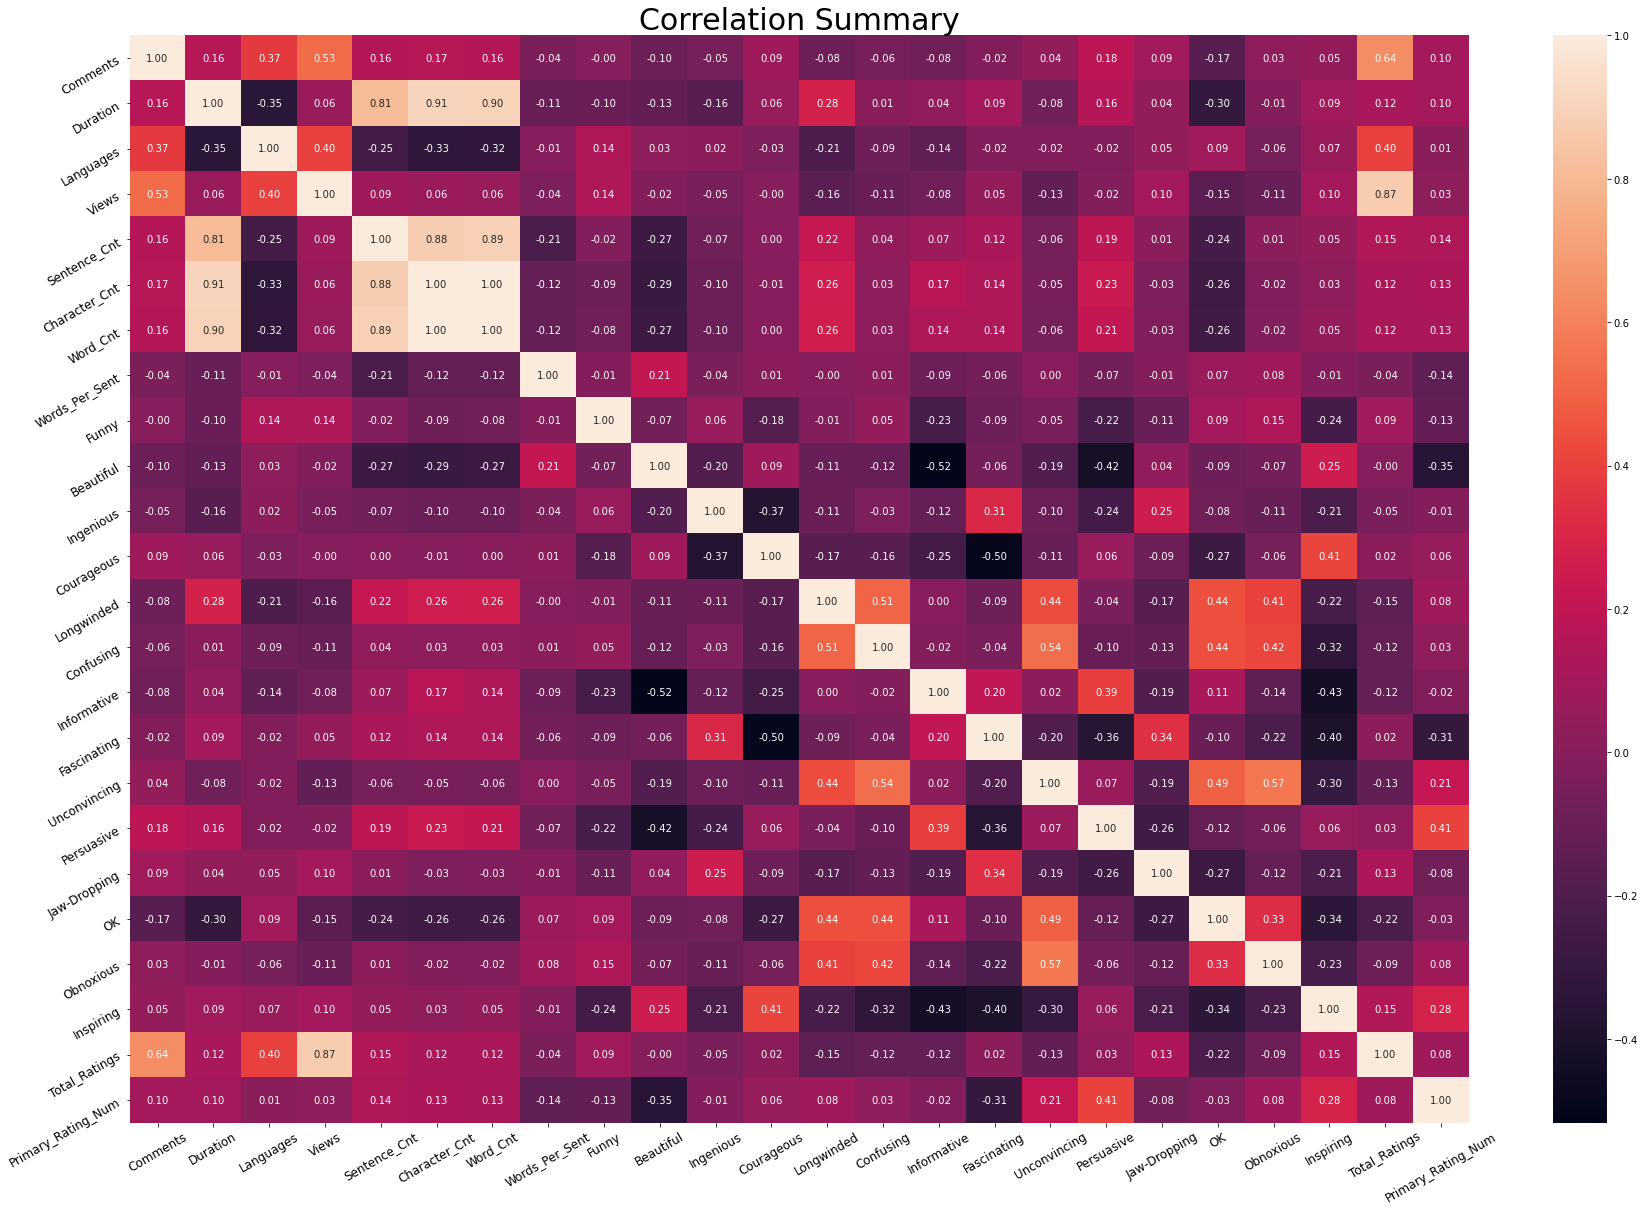

In [119]:
# Plot a Correlation heatmap for the above matrix
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, cmap = 'rocket', fmt = '.2f')

# Update Title and Axes
plt.title("Correlation Summary", fontdict = {'fontsize': 30})

# Adjust Axis Rotations & Sizes
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(rotation = 30, fontsize = 12);

In [120]:
# Create a Correlation Summary Matrix (related to Primary Rating #)
corr_summ = TED_combined[['Primary_Rating_Num', 'Beautiful', 'Fascinating', 'Persuasive', 'Inspiring', 'Unconvincing']].corr()
corr_summ

Primary_Rating_Num  Beautiful  Fascinating  Persuasive  \
Primary_Rating_Num            1.000000  -0.353562    -0.307886    0.406447   
Beautiful                    -0.353562   1.000000    -0.061981   -0.422464   
Fascinating                  -0.307886  -0.061981     1.000000   -0.358862   
Persuasive                    0.406447  -0.422464    -0.358862    1.000000   
Inspiring                     0.283080   0.248798    -0.400867    0.059092   
Unconvincing                  0.212388  -0.193794    -0.198192    0.067412   

                    Inspiring  Unconvincing  
Primary_Rating_Num   0.283080      0.212388  
Beautiful            0.248798     -0.193794  
Fascinating         -0.400867     -0.198192  
Persuasive           0.059092      0.067412  
Inspiring            1.000000     -0.299265  
Unconvincing        -0.299265      1.000000

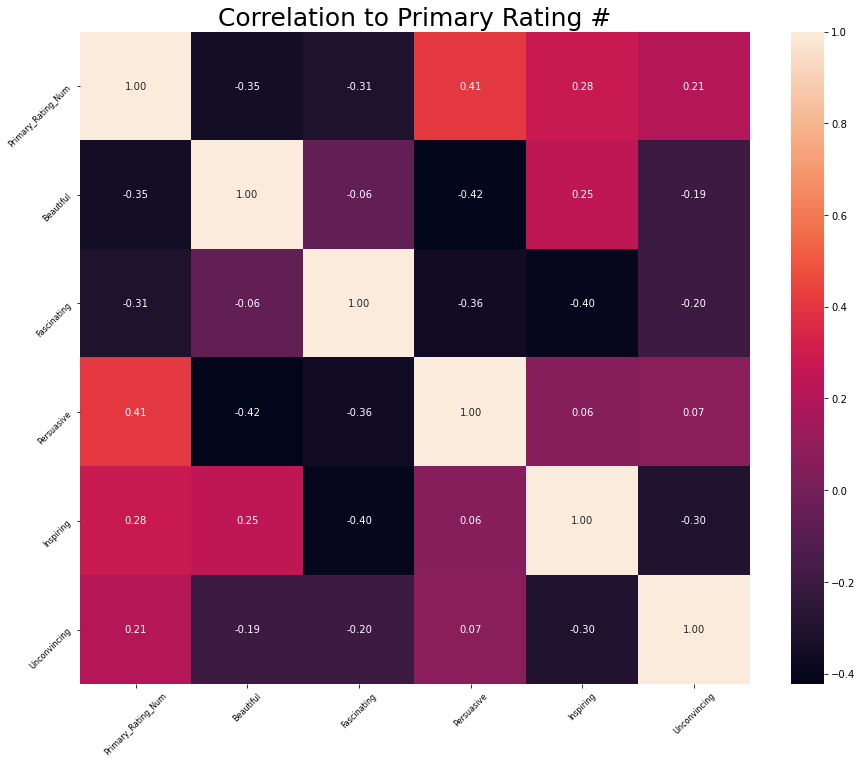

In [121]:
# Plot a Correlation Summary heatmap for the above matrix
plt.figure(figsize = (15,12))
sns.heatmap(corr_summ, annot = True, cmap = 'rocket', fmt = '.2f')

# Update Title and Axes
plt.title("Correlation to Primary Rating #", fontdict = {'fontsize': 25})

# Adjust Axis Rotations & Sizes
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(rotation = 45, fontsize = 8);

**Observations**
- **Duration, Sentence Count, and Character Count are all highly correlated**, which makes sense since all are somewhat derived from the initial transcripts detail (character < word < sentence)
- **Views, followed by Comments are strongly correlated (+87% and 64% respectively) to the Total Ratings column**, indicating that the higher the amount of views, and respective comments that follow, the higher the likelihood of increased rating counts
- None of the individual ratings are strongly correlated to the target variable
- Regarding **Rating Categories**, there are a few notable correlations:
    - **Positive**
        - Unconvincing and Obnoxious (+57%)
        - Unconvincing and Confusing (+54%)
        - Confusing and Longwinded (+51%)
    - **Negative**
        - Informative and Beautiful (-52%)
        - Fascinating and Courageous (-50%)
        - Persuasive and Beautiful (-42%)

- **Vs. Primary Rating # (Target)**:
    - **Positive**
        - Persuasive (+41%)
        - Inspiring (+28%)
        - Unconvincing (+21%)
    - **Negative**
        - Beautiful (-35%)
        - Fascinating (-31%)

### Regression Summary - Top 5 Variables Correlated to Target

In [122]:
# Create Regression List of top variables affecting Target Variable (Primary Rating #) & Run Regression Summary
reg1 = 'Primary_Rating_Num ~ Beautiful + Fascinating + Persuasive + Inspiring + Unconvincing'
reg1_out = smf.ols(reg1, TED_combined).fit()

# Print Summary Details - R Squared will show % of Variance Explained by just the listed variables
print(reg1_out.summary())

                            OLS Regression Results                            
Dep. Variable:     Primary_Rating_Num   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     303.4
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          1.85e-253
Time:                        13:21:19   Log-Likelihood:                -5103.7
No. Observations:                2467   AIC:                         1.022e+04
Df Residuals:                    2461   BIC:                         1.025e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.3097      0.206     16.067   

Although the R-Squared score is only around 40% in the above summary, it shows that **nearly 40% of the variance of the target variable (Primary Rating Number) is explained** by just the 5 Categories/Scores:

**Positive Correlation**
- Unconvincing: Coefficient change of 16 on target for 1 change in variable
- Inspiring: Coefficient change of 9.6 on target for 1 change in variable
- Persuasive: Coefficient change of 7.9 on target for 1 change in variable

**Negative Correlation**
- Beautiful: Coefficient change of -8.7 on target for 1 change in variable
- Fascinating: Coefficient change of -1.1 on target for 1 change in variable

### Rating Categories: Pairplot w. Target

In [123]:
# Print the value counts for the top correlated (+-) Rating Categories to the Primary Rating target
TED_combined['Primary_Rating'][(TED_combined['Primary_Rating'] == 'Unconvincing') 
                              | (TED_combined['Primary_Rating'] == 'Obnoxious')
                              | (TED_combined['Primary_Rating'] == 'Confusing')
                              | (TED_combined['Primary_Rating'] == 'Longwinded')
                              | (TED_combined['Primary_Rating'] == 'Informative')
                              | (TED_combined['Primary_Rating'] == 'Beautiful')
                              | (TED_combined['Primary_Rating'] == 'Fascinating')
                              | (TED_combined['Primary_Rating'] == 'Courageous')].value_counts()

Informative     712
Fascinating     251
Beautiful       142
Courageous       82
Unconvincing     23
Longwinded        8
Obnoxious         3
Confusing         2
Name: Primary_Rating, dtype: int64

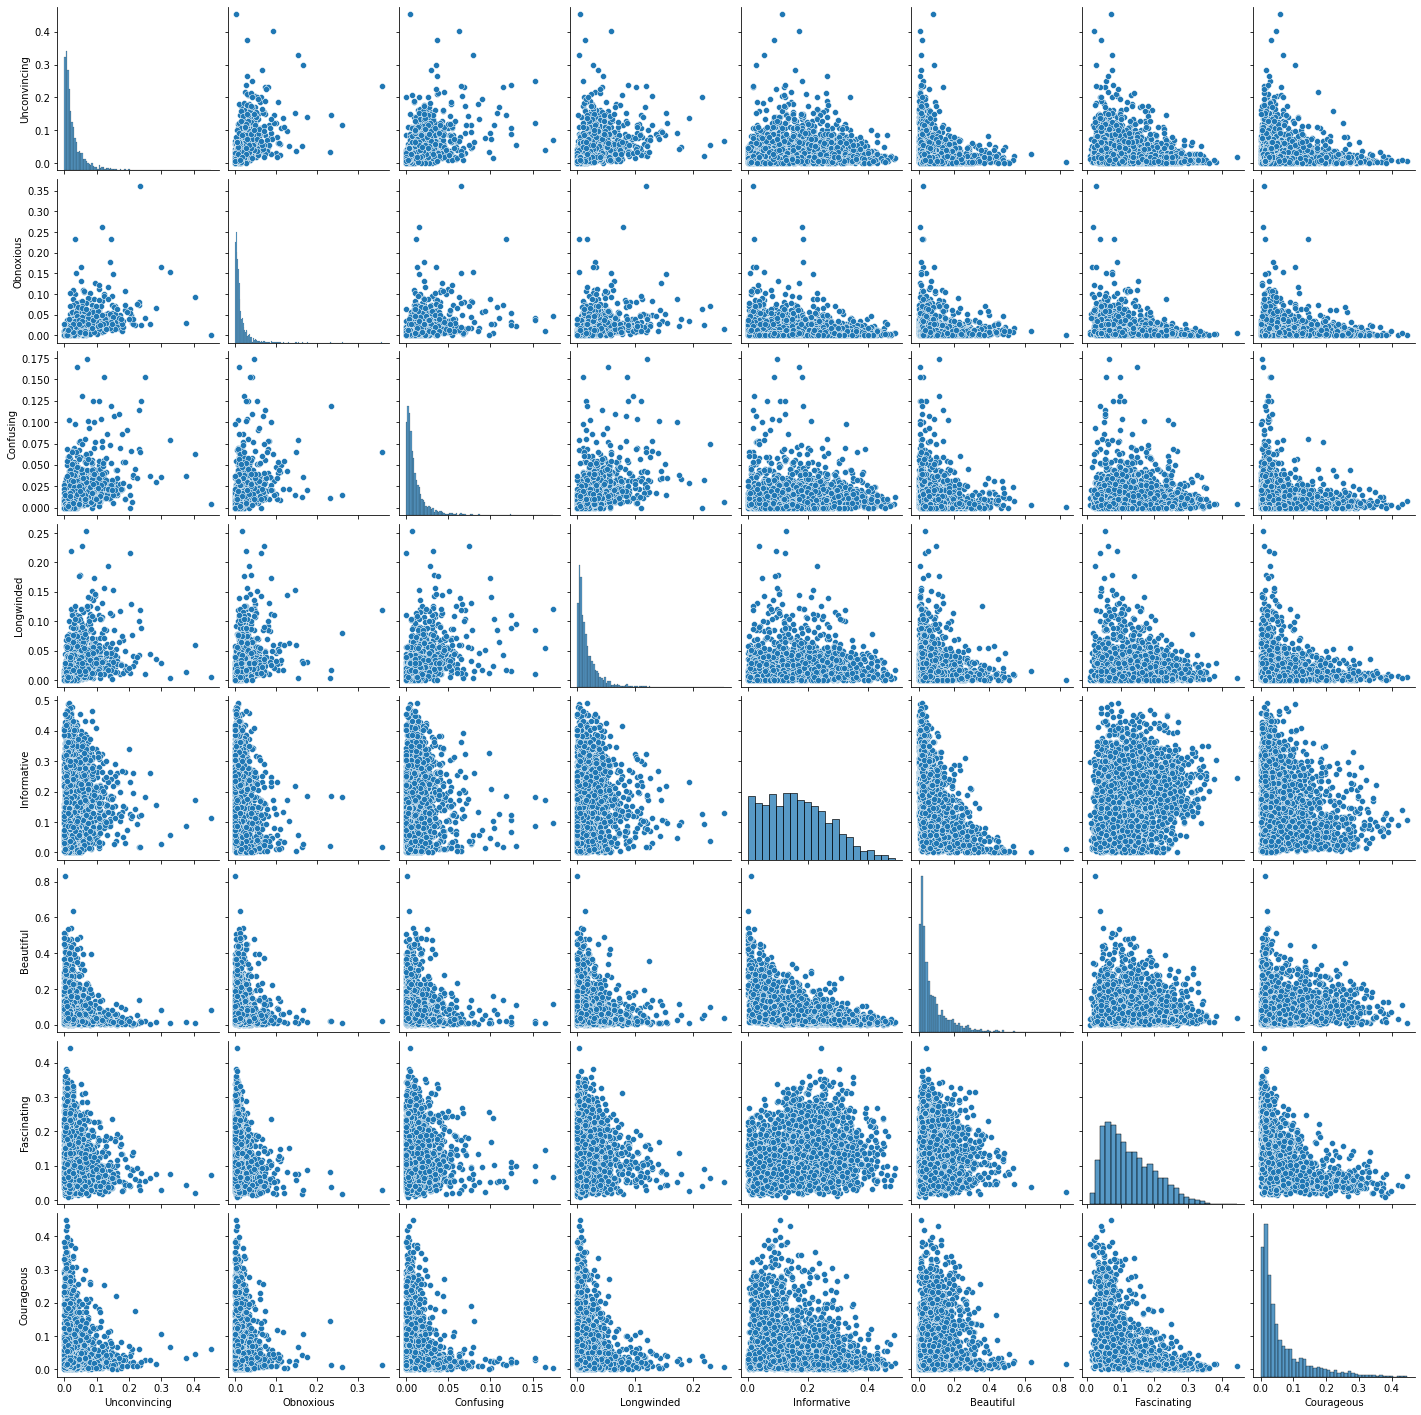

In [124]:
# Create a summary Pairplot with the highest correlated (+/-) ratings
sns.pairplot(data = TED_combined[['Unconvincing', 'Obnoxious', 'Confusing', 'Longwinded', 'Informative', 'Beautiful',
                                 'Fascinating', 'Courageous']]);

- Most of the Ratings are negatively correlated, or at best relatively neutral, namely:
    - A lot of times this would make sense as a Talk that is Unconvincing won't be Persuasive or Fascinating, for example
    - Even two positive ratings have negative correlations, such as a Persuasive talk not being deemed Beautiful or Courageous

## Save/Dump Session - Separate File for NLP & Modeling to Follow

In [126]:
# Save notebook here - avoid reloading entire notebook next session
dill.dump_session('notebook_env.db')